<h1 style="text-align:center;color:green;">House Sale Price Analysis</h1>

# Introduction

* This notebook explores all the features in determining Sale Price of a house.
* The dataset consists of all the features that help in predicting the sale price of a house.
* The complete description of the data is given in the description.txt file attached along with the data.
* Let's start with our analysis.

<img src="https://image.shutterstock.com/image-photo/dreaming-buying-one-those-colorful-260nw-145389406.jpg" style="width:1000px;height:250px;">

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

import seaborn as sns

#Plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

#Some styling
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

import plotly.io as pio
pio.templates.default = "gridon"

#Subplots
from plotly.subplots import make_subplots

#Showing full path of datasets
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


# Import Dataset

In [2]:
#We'll be using the training dataset for our analysis.

df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
sample = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

# Dataset Info

In [3]:
#First 5 rows of our dataset

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Number of rows and columns
df.shape

(1460, 81)

Our dataset consists of **1460** **rows** and **81** **columns**

In [5]:
#Columns in our dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#Description of our dataset
df.describe().T

#T refers to transpose that displays the description of our dataset in long format.

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
#Let's look at the skewness of our dataset

df.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

* Skewness tells us about the symmetry in a distribution.
* If Skewness is equal to zero , It is a symmetrical distribution.
* And If Skewness is less than or more than zero then it is a non-symmetrical distribution.
* If value is less than zero , distribution is left skewed and value is more than zero , distribution is right skewed.
* In our above data,
<ol>
  <li>LotArea</li>
  <li>LowQualFinSF</li> 
  <li>SsnPorchPoolArea</li>
  <li>MiscVal</li>
</ol>
* Are highly positively,right skewed.

In [8]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The above information tells us
* Our dataset features consists of three datatypes
<ol>
<li>float</li>
<li>integer</li>
<li>object</li>
</ol>
* Of which total **numerical** features are **38**
* And **categorical** features are **43**.
* But if we look closely , we see that some of the data types are **incorrect**.
* For ex :- `MSSubClass`,`OverallQual` and `OverallCond` should be **object** data types.
* Also we **don't have complete data** for all of our features


In [9]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

* We can see a lot of columns in our dataset.
* We see that some of the features having int data type consists of discrete values.
* If the features have discrete values , it's better to change them into categorical variables that will help us in better analysis.

In [10]:
#We'll be applying the same changes to df and test dataset.

features_to_change = ['MSSubClass','OverallQual','OverallCond','YearBuilt', 'YearRemodAdd',
                     'MoSold', 'YrSold','GarageCars']

int_to_object = ['MSSubClass','OverallQual','OverallCond','GarageCars']

for feature in int_to_object:
    df[feature] = df[feature].astype(object)
    test[feature] = test[feature].astype(object)
        

In [11]:
#Drop Id column as it is not required

df.drop(columns=['Id'],axis=1,inplace=True)
test.drop(columns=['Id'],axis=1,inplace=True)

## Null Values

In [12]:
#let's see if our dataset contains missing values.

df.isna().sum().sum()

6965

* 6965 is a big number that tells us there are a lot of missing values in train dataset


In [13]:
#Find out missing values in test dataset.
test.isna().sum().sum()

7000

* We have more missing values in test dataset than train dataset.

In [14]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

This doesn't help us much , let's try to visualize the number of missing values in each feature.

In [15]:
#First we create a list of missing values by each feature
temp = list(df.isna().sum())

#then we create a list of columns and their missing values as inner list to a separate list
lst= []
i=0
for col in df.columns:
    insert_lst = [col,temp[i]]
    lst.append(insert_lst)
    i+=1

#finally create a dataframe
temp_df = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

In [16]:
fig = px.bar(temp_df.sort_values(by='Missing_Values'),x='Missing_Values',y='Column_Name',
             orientation='h',height=1500,width=900,color='Missing_Values',text='Missing_Values',title='Missing values in train dataset')
fig.update_traces(textposition='outside')
fig.show()

In [17]:
#The following columns have missing values

temp_df[temp_df['Missing_Values']>0].sort_values(by='Missing_Values',
                                                 ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Column_Name,Missing_Values
0,PoolQC,1453
1,MiscFeature,1406
2,Alley,1369
3,Fence,1179
4,FireplaceQu,690
5,LotFrontage,259
6,GarageType,81
7,GarageYrBlt,81
8,GarageFinish,81
9,GarageQual,81


* Out of the 18 columns with missing values, 
* Three are numerical features `LotFrontage,MasVnrArea and GarageYrBlt`
* And the rest are categorical features.

### Missing values in test dataset

In [18]:
#We'll use the same code
#First we create a list of missing values by each feature
temp = list(test.isna().sum())

#then we create a list of columns and their missing values as inner list to a separate list
lst= []
i=0
for col in test.columns:
    insert_lst = [col,temp[i]]
    lst.append(insert_lst)
    i+=1

#finally create a dataframe
temp_df = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

temp_df[temp_df['Missing_Values']>0].sort_values(by='Missing_Values',
                                                 ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Column_Name,Missing_Values
0,PoolQC,1456
1,MiscFeature,1408
2,Alley,1352
3,Fence,1169
4,FireplaceQu,730
5,LotFrontage,227
6,GarageCond,78
7,GarageYrBlt,78
8,GarageQual,78
9,GarageFinish,78


In [19]:
temp_df[temp_df['Missing_Values']>0].sort_values(by='Missing_Values',
                                                 ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Column_Name,Missing_Values
0,PoolQC,1456
1,MiscFeature,1408
2,Alley,1352
3,Fence,1169
4,FireplaceQu,730
5,LotFrontage,227
6,GarageCond,78
7,GarageYrBlt,78
8,GarageQual,78
9,GarageFinish,78


* We have more features here with missing values.

### Firstly , we'll deal with the numerical features in train dataset and do similar changes in test dataset.

**LotFrontage has 259 missing values.**

**MasVnrArea has only 8 missing values**

**GarageyrBlt has 81 missing values.**

Let's start filling these null values

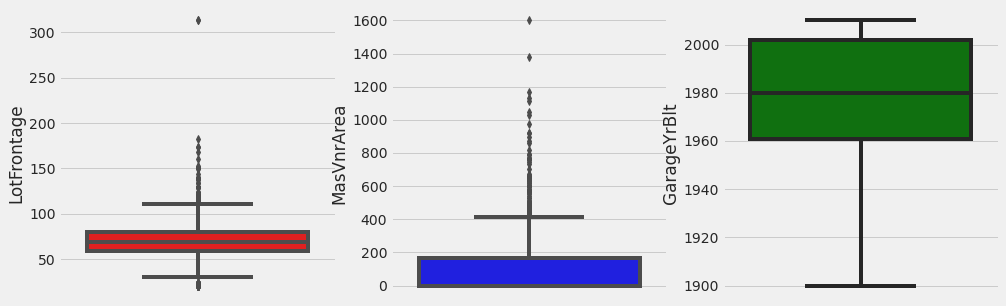

In [20]:
#There's no need of dropping the na values as we have less missing values.
#If there are outliers in these three columns, we can fill them with their median values.
#if not then mean is fine.

plt.figure(figsize=(15,5))

features_to_examine = ['LotFrontage','MasVnrArea','GarageYrBlt']
temp = df[features_to_examine]
colors=['','red','blue','green']
i=1
for col in temp.columns:
    plt.subplot(1,3,i)
    a1 = sns.boxplot(data=temp,y=col,color=colors[i])
    i+=1

In [21]:
#There are outliers in Lotfrontage and MasVnrArea .
#Let's look at the mean and median values of all three columns

df['LotFrontage'].mean(),df['LotFrontage'].median()

(70.04995836802665, 69.0)

In [22]:
df['MasVnrArea'].mean(),df['MasVnrArea'].median()

(103.68526170798899, 0.0)

In [23]:
df['GarageYrBlt'].mean(),df['GarageYrBlt'].median()

(1978.5061638868744, 1980.0)

* The mean and median values of MasVnrArea are significantly different.
* If there are outliers present, we'll go with median values.

In [24]:
features_to_examine

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [25]:
#filling the missing values with median
for col in features_to_examine:
    df[col].fillna(df[col].median(),inplace=True)
    

In [26]:
#for test dataset
for col in features_to_examine:
    test[col].fillna(test[col].median(),inplace=True)

In [27]:
#We can see that there are no missing values present now

df[features_to_examine].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [28]:
test[features_to_examine].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

### Now let's examine categorical features

In [29]:
features_to_examine = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish',
 'GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

* Some of the categorical features have many missing values.
* Instead of filling them we can simply drop these columns

`PoolQC`,`MiscFeature`,`Alley` and `Fence` are the categorical features with more than 1000 missing values in the dataset

In [30]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [31]:
df['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [32]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [33]:
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

* As there is very less data available for these four columns,we can drop them

In [34]:
#Dropping columns in both train and test datasets.

df.drop(columns=['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)
test.drop(columns=['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)


In [35]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

* We only have half of Fireplace quality data.Let's have a look at the Fireplaces feature.

In [36]:
df[df['FireplaceQu'].isnull()][['Fireplaces','FireplaceQu']]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
1452,0,NaN
1453,0,NaN
1454,0,NaN
1458,0,NaN


* So we can see that the missing values are at those places , where number of fireplaces is zero.
* We can't fill these missing values with anything.As there is no meaning in it.
* Instead we will create a separate category in FireplaceQu feature of NotAvailable.

In [37]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('NotAvailable')
test['FireplaceQu'] = test['FireplaceQu'].fillna('NotAvailable')

In [38]:
#Out of the features to examine , following are left
features_to_examine = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2','Electrical','GarageType','GarageFinish',
 'GarageQual','GarageCond']



* Now we'll go one by one , to see by what factor to fill the null values of above columns

#### 1) MasVnrType

In [39]:
df['MasVnrType'].isna().sum()

8

* Masonry veneer type columns has **8** missing values.

In [40]:
#Unique elements
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [41]:
df[df['MasVnrType'].isnull()][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,0.0
529,NaN,0.0
650,NaN,0.0
936,NaN,0.0
973,NaN,0.0
977,NaN,0.0
1243,NaN,0.0
1278,NaN,0.0


**Note:-**

* If we look at the types of masonry venner and their corresponding area,
* for all the missing values , Area is zero
* So we can fill these missing values with "None"

In [42]:
#Let's look at the repeated value in MasVnrType column

df['MasVnrType'].mode()

0    None
dtype: object

* We can replace MasVnrType missing values with mode.

**2) Basement**

In [43]:
df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2']].isna().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
dtype: int64

In [44]:
df[df['BsmtQual'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1',
                        'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0,0,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [45]:
df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2']].mode()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
0,TA,TA,No,Unf,Unf


* What I have understood is , the missing data may be because there is no basement.
* As all the other basement features as seen above are zero
* We can't fill the missing values with mode values
* We'll fill the null values with `No Basement`

**3) Electrical**

In [46]:
df['Electrical'].isna().sum()

1

In [47]:
df['Electrical'].mode()

0    SBrkr
dtype: object

* As there is only **1** missing value, we will replace it with mode value i.e `SbrKr`

**4) Garage**

In [48]:
df[['GarageType','GarageFinish',
 'GarageQual','GarageCond']].isna().sum()

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [49]:
df[df['GarageType'].isnull()][['GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,1980.0,NaN,0,0,NaN,NaN
48,NaN,1980.0,NaN,0,0,NaN,NaN
78,NaN,1980.0,NaN,0,0,NaN,NaN
88,NaN,1980.0,NaN,0,0,NaN,NaN
89,NaN,1980.0,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,1980.0,NaN,0,0,NaN,NaN
1407,NaN,1980.0,NaN,0,0,NaN,NaN
1449,NaN,1980.0,NaN,0,0,NaN,NaN
1450,NaN,1980.0,NaN,0,0,NaN,NaN


In [50]:
df[['GarageType','GarageFinish',
 'GarageQual','GarageCond']].mode()

,GarageType,GarageFinish,GarageQual,GarageCond
0,Attchd,Unf,TA,TA


* There are **81** missing values in each of the four columns.

* The missing data may be as no data is available for the garage.
* We can't fill these too with their mode values as we do not have any idea abvout the garage.
* We'll simply fill them with `No Garage`

In [51]:
#We are done with all the categorical features

df['MasVnrType'].fillna('None',inplace=True)
fill_with_No_Bsmt = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
fill_with_No_Grg = ['GarageType','GarageFinish','GarageQual','GarageCond']

for col in fill_with_No_Bsmt:
    df[col].fillna('No_Bsmt',inplace=True)
    test[col].fillna('No_Bsmt',inplace=True)
    
for col in fill_with_No_Grg:
    df[col].fillna('No_Grg',inplace=True)
    test[col].fillna('No_Grg',inplace=True)
    
df['Electrical'].fillna('SBrkr',inplace=True)
test['Electrical'].fillna('SBrkr',inplace=True)

In [52]:
#Let's check if there any missing values left in train dataset first

df.isna().sum().sum()

0

In [53]:
#Let's check for test dataset

test.isna().sum().sum()

38

* There are still some missing values in test dataset as we were following train dataset

In [54]:
#Use the same code to see which features are left with missing values.

temp = list(test.isna().sum())

#then we create a list of columns and their missing values as inner list to a separate list
lst= []
i=0
for col in test.columns:
    insert_lst = [col,temp[i]]
    lst.append(insert_lst)
    i+=1

#finally create a dataframe
temp_df = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

temp_df = temp_df[temp_df['Missing_Values']>0].sort_values(by='Missing_Values',
                                                 ascending=False).reset_index(drop=True)

temp_df.style.background_gradient(cmap='Reds')

,Column_Name,Missing_Values
0,MasVnrType,16
1,MSZoning,4
2,Utilities,2
3,BsmtFullBath,2
4,BsmtHalfBath,2
5,Functional,2
6,Exterior1st,1
7,Exterior2nd,1
8,BsmtFinSF1,1
9,BsmtFinSF2,1


In [55]:
features_to_examine=temp_df['Column_Name'].unique().tolist()
features_to_examine

['MasVnrType',
 'MSZoning',
 'Utilities',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Functional',
 'Exterior1st',
 'Exterior2nd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'KitchenQual',
 'GarageCars',
 'GarageArea',
 'SaleType']

In [56]:
test[features_to_examine].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MasVnrType    1443 non-null   object 
 1   MSZoning      1455 non-null   object 
 2   Utilities     1457 non-null   object 
 3   BsmtFullBath  1457 non-null   float64
 4   BsmtHalfBath  1457 non-null   float64
 5   Functional    1457 non-null   object 
 6   Exterior1st   1458 non-null   object 
 7   Exterior2nd   1458 non-null   object 
 8   BsmtFinSF1    1458 non-null   float64
 9   BsmtFinSF2    1458 non-null   float64
 10  BsmtUnfSF     1458 non-null   float64
 11  TotalBsmtSF   1458 non-null   float64
 12  KitchenQual   1458 non-null   object 
 13  GarageCars    1458 non-null   object 
 14  GarageArea    1458 non-null   float64
 15  SaleType      1458 non-null   object 
dtypes: float64(7), object(9)
memory usage: 182.5+ KB


In [57]:
# We fill all the categorical features with mode and numerical features with mean

cat = [col for col in features_to_examine if test[col].dtype=='O']

for feature in cat:
    test[feature] = test[feature].fillna(test[feature].mode()[0])
    
num = [col for col in features_to_examine if test[col].dtype!='O']

for feature in num:
    test[feature] = test[feature].fillna(test[feature].median())

In [58]:
test.isna().sum().sum()

0

## Thus , we are done with missing values in both training and test dataset

# Target Feature

### Sale Price

In [59]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

* Our target feature is a continuous variable with values ranging from 34900 to 755000.
* The average sale price of all the houses in our dataset is 180921.

In [60]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=df['SalePrice']),row=1,col=1)
fig.add_trace(go.Box(y=df['SalePrice'],boxpoints='all',line_color='orange'),row=1,col=2)

fig.update_layout(height=500, showlegend=False,title_text="Sale Price Distribution and Box Plot")


* Sale Price has a right skewed distribution.
* The median sale price of our dataset is **163000** which is less than the average value i.e because of right skewed distribution.
* We can see some of the houses have sale price more than **4,00,000**.


## Sale Price with Other Features

* We take numerical and categorical features and analyze the highly correlated features with our target feature.

# Numerical Analysis

* There are two types of numerical features 
* Discrete and Continuous
* If there are discrete features in our dataset, we need to separate them and analyze as categorical variables.
* Because if they are included in numerical analysis , we won't find any correlation between discrete features and target feature.



* First step , we separate discrete features

In [61]:
discrete=[]
for col in df.columns:
    if df[col].dtype=='int64' and len(df[col].unique()) <=15:
        discrete.append(col)

# Discrete Numerical Analysis

In [62]:
print("Discrete Features :: \n\n{}".format(discrete))

Discrete Features :: 

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea', 'MoSold', 'YrSold']


In [63]:
#Let's have a look at the unique values of each of these features
for col in discrete:
    print("{} has {} unique values.".format(col,df[col].unique()))

BsmtFullBath has [1 0 2 3] unique values.
BsmtHalfBath has [0 1 2] unique values.
FullBath has [2 1 3 0] unique values.
HalfBath has [1 0 2] unique values.
BedroomAbvGr has [3 4 1 2 0 5 6 8] unique values.
KitchenAbvGr has [1 2 3 0] unique values.
TotRmsAbvGrd has [ 8  6  7  9  5 11  4 10 12  3  2 14] unique values.
Fireplaces has [0 1 2 3] unique values.
PoolArea has [  0 512 648 576 555 480 519 738] unique values.
MoSold has [ 2  5  9 12 10  8 11  4  1  7  3  6] unique values.
YrSold has [2008 2007 2006 2009 2010] unique values.


* Visualize Discrete Features with their average Sale Price

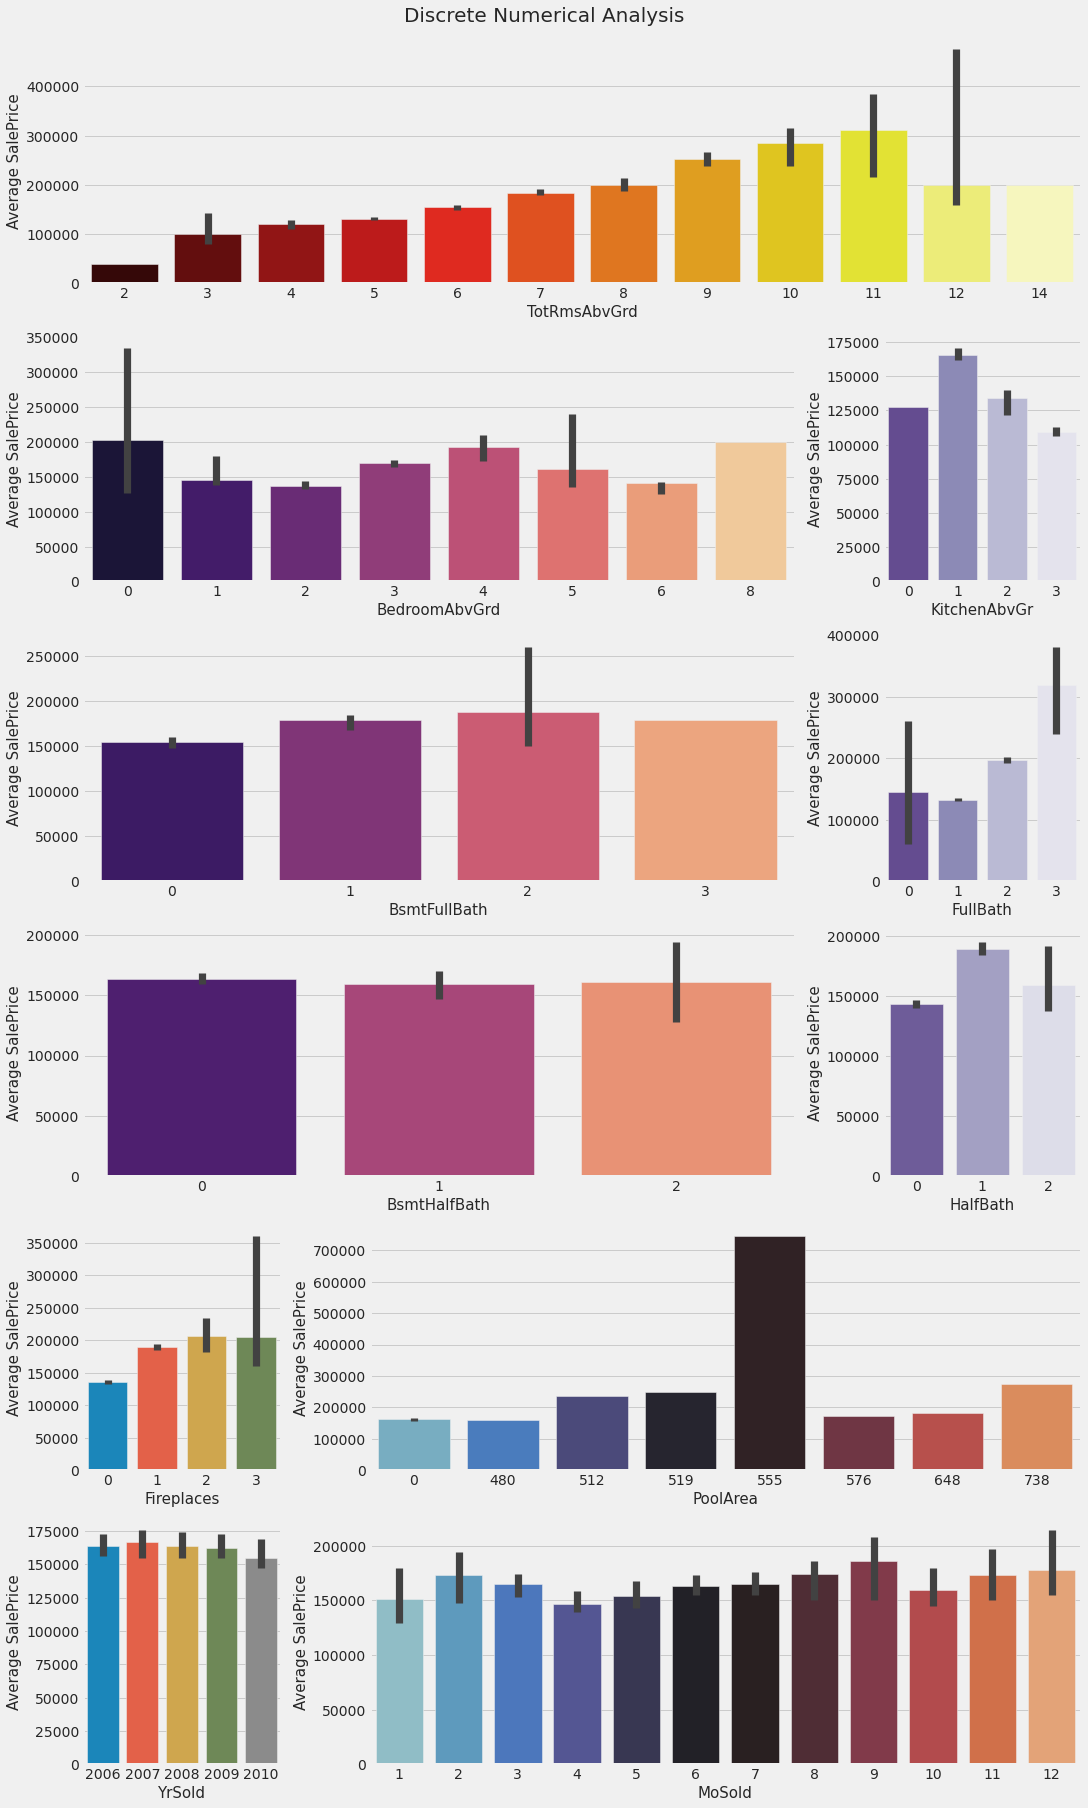

In [64]:
from numpy import median

fig = plt.figure(constrained_layout=True,figsize=(15,25))
gs = GridSpec(6, 3, figure=fig)

plt.subplot(gs[0,:])
a1 = sns.barplot(data=df,x="TotRmsAbvGrd",y="SalePrice",estimator=median,palette='hot')
plt.xlabel("TotRmsAbvGrd",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[1,:-1])
a1 = sns.barplot(data=df,x="BedroomAbvGr",y="SalePrice",estimator=median,palette='magma')
plt.xlabel("BedroomAbvGrd",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[1,-1])
a1 = sns.barplot(data=df,x="KitchenAbvGr",y="SalePrice",estimator=median,palette='Purples_r')
plt.xlabel("KitchenAbvGr",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[2,:-1])
a1 = sns.barplot(data=df,x="BsmtFullBath",y="SalePrice",estimator=median,palette='magma')
plt.xlabel("BsmtFullBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[2,-1])
a1 = sns.barplot(data=df,x="FullBath",y="SalePrice",estimator=median,palette='Purples_r')
plt.xlabel("FullBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[3,:-1])
a1 = sns.barplot(data=df,x="BsmtHalfBath",y="SalePrice",estimator=median,palette='magma')
plt.xlabel("BsmtHalfBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[3,-1])
a1 = sns.barplot(data=df,x="HalfBath",y="SalePrice",estimator=median,palette='Purples_r')
plt.xlabel("HalfBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[4,:-2])
a1 = sns.barplot(data=df,x="Fireplaces",y="SalePrice",estimator=median)
plt.xlabel("Fireplaces",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[4,-2:])
a1 = sns.barplot(data=df,x="PoolArea",y="SalePrice",estimator=median,palette='icefire')
plt.xlabel("PoolArea",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[5,:-2])
a1 = sns.barplot(data=df,x="YrSold",y="SalePrice",estimator=median)
plt.xlabel("YrSold",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[5,-2:])
a1 = sns.barplot(data=df,x="MoSold",y="SalePrice",estimator=median,palette='icefire')
plt.xlabel("MoSold",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.suptitle("Discrete Numerical Analysis",fontsize=20);

* `Total Rooms Above Ground` :- As the total number of rooms increases , average price of the house increase until 11 rooms after which it sees a decrease in price.
* `Bedroom Above Ground` :- Here we don't see a exponential curve, as for 0 bedrooms the sale price is highest followed by 4 and 8 bedrooms.The lowest is for 2 and 6 bedrooms.
* `Kitchen Above ground` :- Here as the number increases , price decreases.Price is highest for only one kitchent that is enough .No one demands for more than one kitchen.
* `In `Basemnt Full bathrooms` and `Basement Half bathrooms` we don't see a much difference.If there is no bathroom,obviously price will be less.
* Now if we don't consider basement rooms,i.e Above grade `Full Bathrooms` and `Half bathrooms` .If there are 3 full bathrooms ,the price is highest and for 1 or 2 half bathrooms the average price is more than 150000.
* `Fireplaces` :- As fireplaces will increase in the house , sale price will also increase.
* `PoolArea` :- Here we are talking about square feet. And from the barplot 555 sqft area is having highest sale price on average.More Area , More Sale Price.
* `Year Sold` :- The houses in our dataset were sold from year 2006.We can see a bit downward slope from 2006 to 2010.
* `Month Sold` :- There is not much to study about which month the house sold has higher or lower Sale Price.

### Now we can analyze the rest of the continuous numerical features

In [65]:
#Here we create a list of all the numerical features in our dataset.
#And we have already separated the discrete features.
#But we separate year features , as we will study them later.
num = []

for col in df.columns:
    if df[col].dtype=='int64' and col not in ['YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt'] and col not in discrete:
        num.append(col)

In [66]:
print("Numerical Features :: \n\n{}".format(num))

Numerical Features :: 

['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


* We'll have a look at the correlation between all the features with the help of Heatmap.
* Heatmap will tell us which features are positively ,negatively and have no correlation with our target feature that we are trying to predict here .i.e Sale Price.
* As there are a lot of features , we'll take 10 features at a time for better visual analysis.

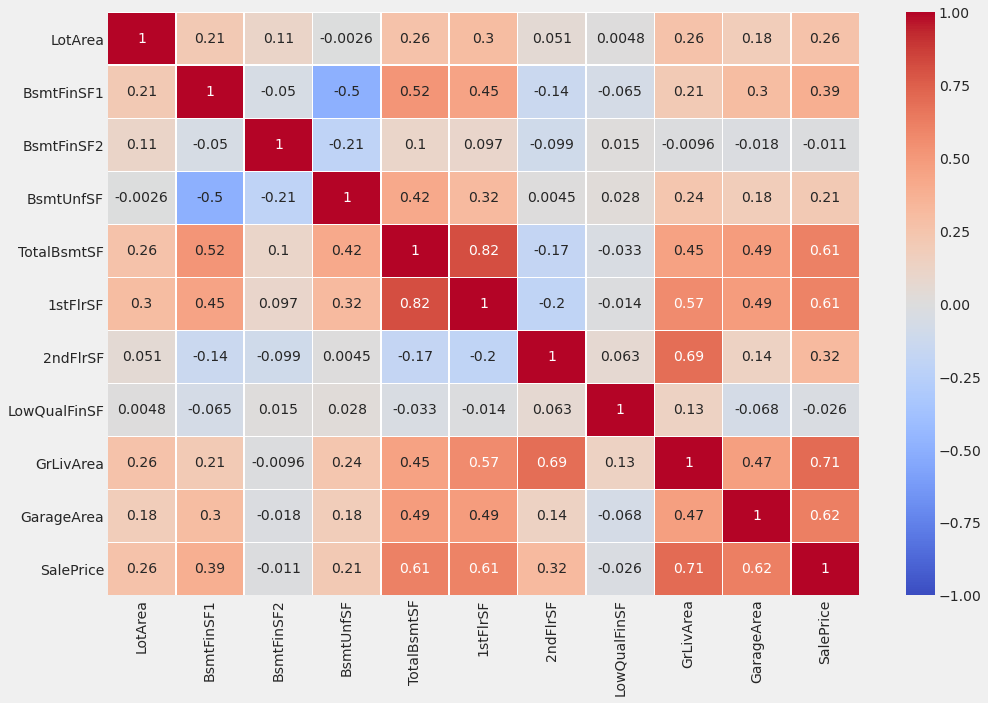

In [67]:
#First ten features

df_corr = df[num].iloc[:,0:10]
df_corr['SalePrice'] = df['SalePrice']
corr = df_corr.corr()

fig = plt.figure(figsize=(15,10))

#Here we use cmap CoolWarm as it gives us a better view of postive and negative correlation.
#And with the help of vmin and vmax set to -1 and +1 , the features having values closer to +1 have positive correlation and features having values closer to -1 have negative correlation.
sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);

* Among the first 10 numerical features, 
* Above Ground Living Area sq ft is having a `positive correlation` of **0.71** with `Sale Price` which is obvious.
* `Total Basement surface area` and `first floor surface area` also have a positive correlation of **0.61** with `Sale Price`.
* We also expect `LotArea` to have a better correlation with Sale Price as increase in LotArea may also increase price of the house.
* We can see two features have negative correlation with SalePrice.
* BsmtFinSF2 [-0.011]
* LowQualFinSF [-0.026]

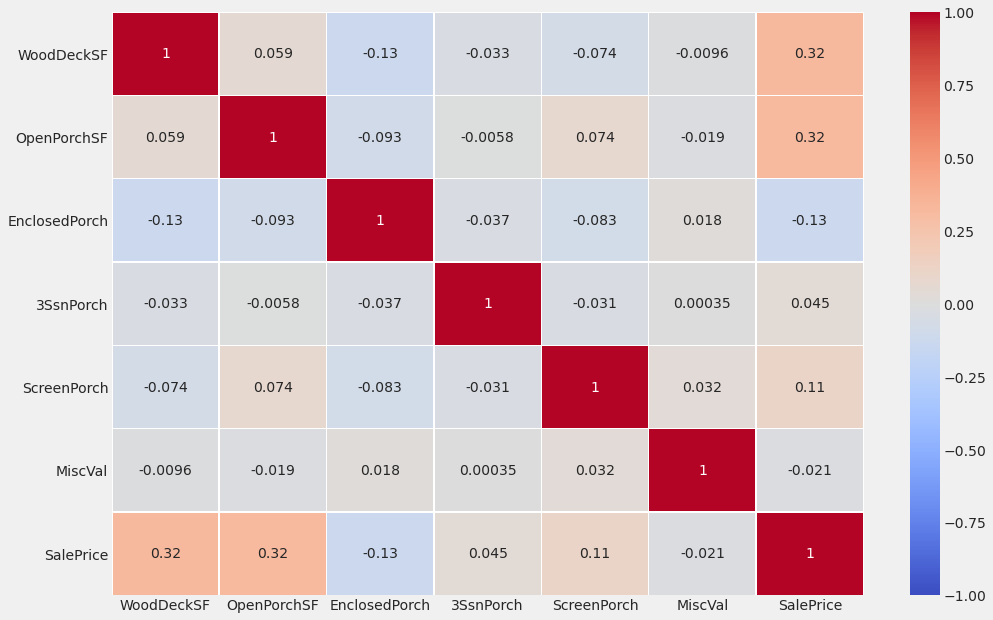

In [68]:
#Next features

df_corr = df[num].iloc[:,10:]
df_corr['SalePrice'] = df['SalePrice']
corr = df_corr.corr()

fig = plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);

* In the next ten features , `Garage Area` has a **positive** correlation of **0.62** with `Sale Price`.
* `FullBath` is having a positive correlation of **0.56**.
* `TotRmsAbvGrd` feature has a **0.53** correlation with SalePrice.

* So in numerical features,

**1) Above Grade Living Area**

**2) Basement surface area**

**3) First floor surface area**

**4) Garage Area**

### Scatterplots

In [69]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [70]:
fig = make_subplots(rows=2, cols=2)

features_to_examine = ['TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']

i=0
for row in range(1,3):
    for col in range(1,3):
        fig.add_trace(go.Scatter(y=df['SalePrice'],x=df[features_to_examine[i]],name=features_to_examine[i],
                                mode='markers'),row=row,col=col)
        i+=1
fig.update_layout(height=1000, showlegend=True,title_text="Positive Correlated features with Sale Price")
fig.show()

* The Scatterplot shows us the extent of correlation of the above positive correlated features from the heatmap.
* We can see that as the features on xaxis increases , Sale Price also increases.This shows the positive correlation between them.

# Categorical Analysis

**We will focus now on categorical variables in our dataset.**

**As there are many categorical variables ,they will be grouped into categories**

**And each feature will be explored with respect to Sale Price (target feature)**

In [71]:
#Creating a list of all our categorical variables
cat=[]
for col in df.columns:
    if df[col].dtype=='object':
        cat.append(col)
        
#printing the list
print("Categorical variables :: \n\n{}".format(cat))

Categorical variables :: 

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


<h1 style="text-align:center;">Category 1 :: Type of dwellings</h1>

In [72]:
cat1 = ['MSSubClass']

#### MSSubClass: Identifies the type of dwelling(parts for sale by the owner) involved in the sale.

In [73]:
#Converting integer values of MSSubClass to their respective categorical values given in description.
#Create a copy of the dataset and replace all numeric values with their respective categories.

df_new = df.copy()

df_new['MSSubClass'] = df_new['MSSubClass'].replace({20:'1_STORY_NEWER',
                                                    30:'1_STORY_OLDER',40:'1_STORY_ATTIC',
                                                    45:'1_1/2_UNFINISHED',
                                                    50:'1_1/2_FINISHED',60:'2_STORY_NEWER',
                                                    70:'2_STORY_OLDER',75:'2_1/2_STOPY',
                                                    80:'SPLIT/MULTILEVEL',85:'SPLIT_FOYER',
                                                    90:'DUPLEX',120:'1_STORY_PUD',
                                                    150:'1_1/2_STORY_PUD',
                                                    160:'2_STORY_PUD',
                                                    180:'PUD_MULTILEVEL',
                                                    190:'2_FAMILY_CONVERSION'})

#Covert to object
df_new['MSSubClass'] = df_new['MSSubClass'].astype(object)

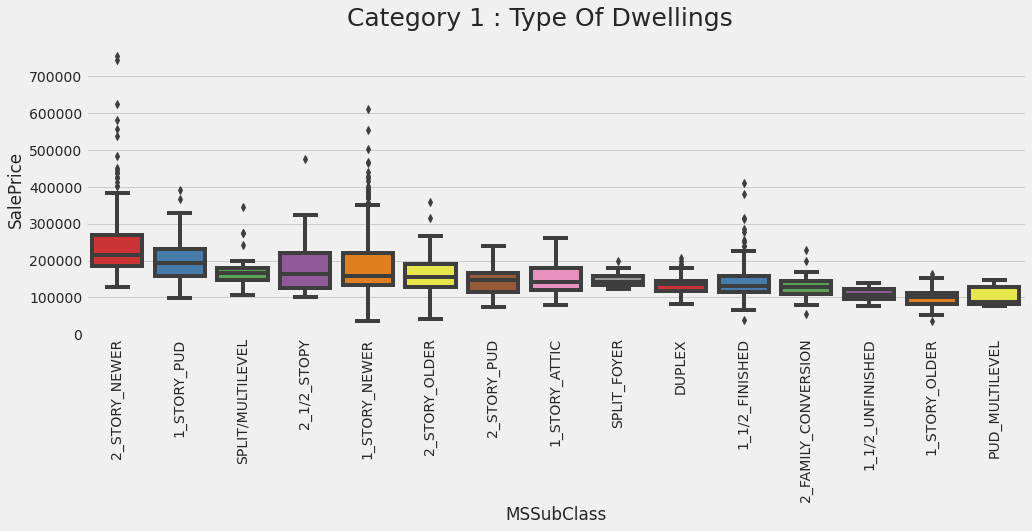

In [74]:
fig=plt.figure(figsize=(15,5))

table = df_new.groupby(['MSSubClass'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
ax = sns.boxplot(data=df_new,x="MSSubClass",y="SalePrice",order=table['MSSubClass'].to_list(),
                palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
fig.suptitle("Category 1 : Type Of Dwellings",fontsize=25);


**`Note`:- The boxplots of all the features are plotted in descending order with respect to their median Sale price.**

**The features to the left have higher sale price than and the features to the left lower sale price.**

* In MSSubClass , The `Newer 2-STORY` and `1-Story PUDs` have on average **higher sale price** than the others.
* There are outliers present in newer sub classes and the one's on the left.
* We can also see there is some non-uniformity in the sub classes by looking at the size of the boxplot. 

In [75]:
#This table tells us the count of the above feature in the dataset and calculates average Sale price.
table = df_new.groupby(['MSSubClass'])['MSSubClass','SalePrice'].agg({"MSSubClass":"count","SalePrice":"median"})
table = table.sort_values(by="SalePrice",ascending=False)
table.style.background_gradient(cmap="Reds")

,MSSubClass,SalePrice
MSSubClass,,
2_STORY_NEWER,299,215200
1_STORY_PUD,87,192000
SPLIT/MULTILEVEL,58,166500
2_1/2_STOPY,16,163500
1_STORY_NEWER,536,159250
2_STORY_OLDER,60,156000
2_STORY_PUD,63,146000
1_STORY_ATTIC,4,142500
SPLIT_FOYER,20,140750


* The box plot showed us 2 story newer and 1 story pud had higher average price.
* But most of the data is for 1 story newer class and its average price is less than 160000.
* We can expect some non uniformity in the data.
* But overall , MSSubClass is a good feature for predicting Sale Price.

<h1 style="text-align:center;">Category 2 :: Structure of Land and Property</h1>

In [76]:
cat2=['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope']

**`MSZoning`: Identifies the general zoning classification of the sale.**

**Zoning allows local governments to regulate which areas under their jurisdiction may have real estate or land used for particular purposes**

**`Street`: Type of road access to property**

**`LotShape`: General shape of property**

**`LandContour`: Flatness of the property**

**`LotConfig`: Lot configuration**

**`LandSlope`: Slope of property**

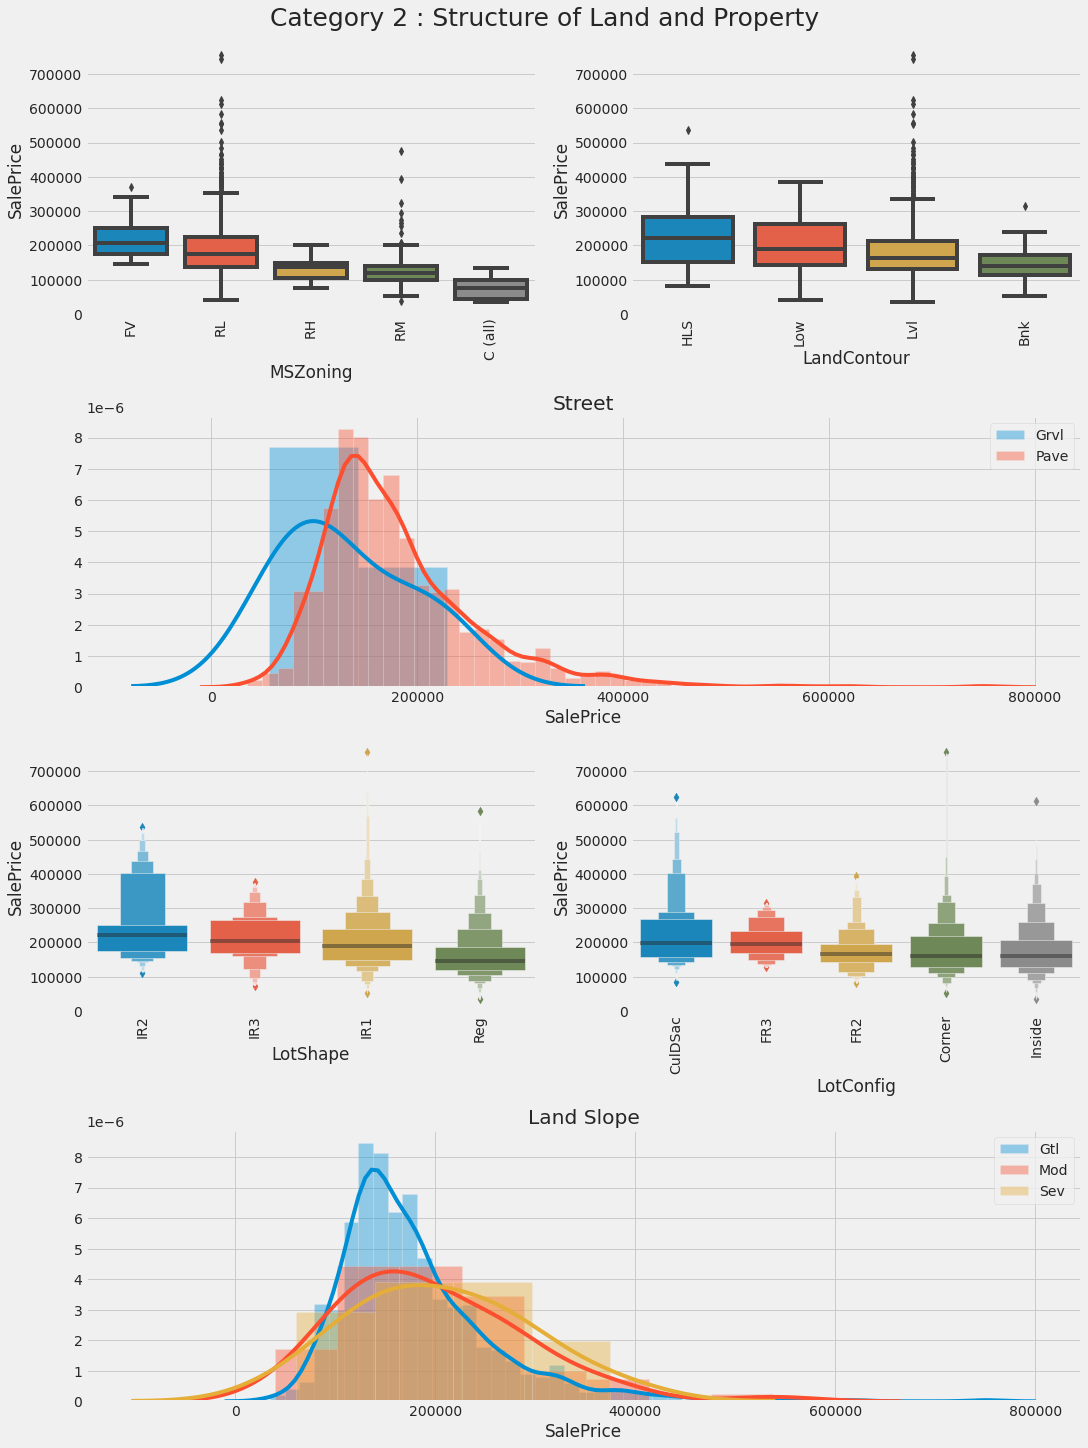

In [77]:
fig = plt.figure(constrained_layout=True,figsize=(15,20))
gs = gridspec.GridSpec(4, 2,figure=fig)

plt.subplot(gs[0,0])
table = df.groupby(['MSZoning'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='MSZoning',y="SalePrice",order=table['MSZoning'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[0,1])
table = df.groupby(['LandContour'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='LandContour',y="SalePrice",order=table['LandContour'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:])
a1 = sns.distplot(df[df['Street']=='Grvl']['SalePrice'])
a1 = sns.distplot(df[df['Street']=='Pave']['SalePrice'])
plt.legend('upper right' , labels = ['Grvl','Pave'])
plt.xlabel("SalePrice")
plt.title("Street")

plt.subplot(gs[2,0])
table = df.groupby(['LotShape'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=df,x='LotShape',y="SalePrice",order=table['LotShape'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[2,1])
table = df.groupby(['LotConfig'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=df,x='LotConfig',y="SalePrice",order=table['LotConfig'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[3,:])
a1 = sns.distplot(df[df['LandSlope']=='Gtl']['SalePrice'])
a1 = sns.distplot(df[df['LandSlope']=='Mod']['SalePrice'])
a1 = sns.distplot(df[df['LandSlope']=='Sev']['SalePrice'])
plt.legend('upper right' , labels = ['Gtl','Mod','Sev'])
plt.xlabel("SalePrice")
plt.title("Land Slope")

fig.suptitle("Category 2 : Structure of Land and Property",fontsize=25);


* `MSZoning`:- Floating Village Residential zone (FV) is having higher Sale Price of around 2 lakhs.While Commercial zones are having the lowest Sale Price.And we see a variation in Sale Price in different zones which makes it an important feature for our prediction.
* `LandContour`:- If the house has significant slope on both sides (HLS) or is nearly flat(Low), Sale Price is more.For Depressed and Banked slopes , Sale price falls down.
* `Street` :- For flat stones or bricks access , Price is higher and majority of houses with gravel have price around 2 lakhs.But as there is very less data for Gravel street type . this feature is not that good for our prediction.
* `LotShape` :- We can see that houses with regular shapes have low price.And as the irregularity increases , the average sale price of the house also increases.
* `LotConfig` :- The configuration of the lot does not appear to vary the price sginificantly.The properties with Cul de Sac(street or passage closed at one end) and FR3(Frontage on 3 sides of property) configuration on average are having high value than the other configurations.
* `LandSlope` :- Most of the properties are having gentle slope and are lowest priced , while properties having  moderate or severe slope have higher value.

<h1 style="text-align:center;">Category 3 :: Overall Quality and Condition</h1>

In [78]:
cat2=['OverallQual','OverallCond']

**`OverallQual`: Rates the overall material and finish of the house**
    
**`OverallCond`: Rates the overall condition of the house**

In [79]:
#Changing Overall quality and condition's values to categorical values
#OverallQual: Rates the overall material and finish of the house
   
df_new['OverallQual'] = df_new['OverallQual'].replace({10:'Very Exc',9:'Exc',8:'VG',7:'Good',
                                                      6:'Abv Avg',5:'Avg',4:'Bel Avg',3:'Fair',
                                                      2:'Poor',1:'Very Poor'})

#Covert to object
df_new['OverallQual'] = df_new['OverallQual'].astype(object)

#OverallCond: Rates the overall condition of the house

df_new['OverallCond'] = df_new['OverallCond'].replace({10:'Very Exc',9:'Exc',8:'VG',7:'Good',
                                                      6:'Abv Avg',5:'Avg',4:'Bel Avg',3:'Fair',
                                                      2:'Poor',1:'Very Poor'})

#Covert to object
df_new['OverallCond'] = df_new['OverallCond'].astype(object)

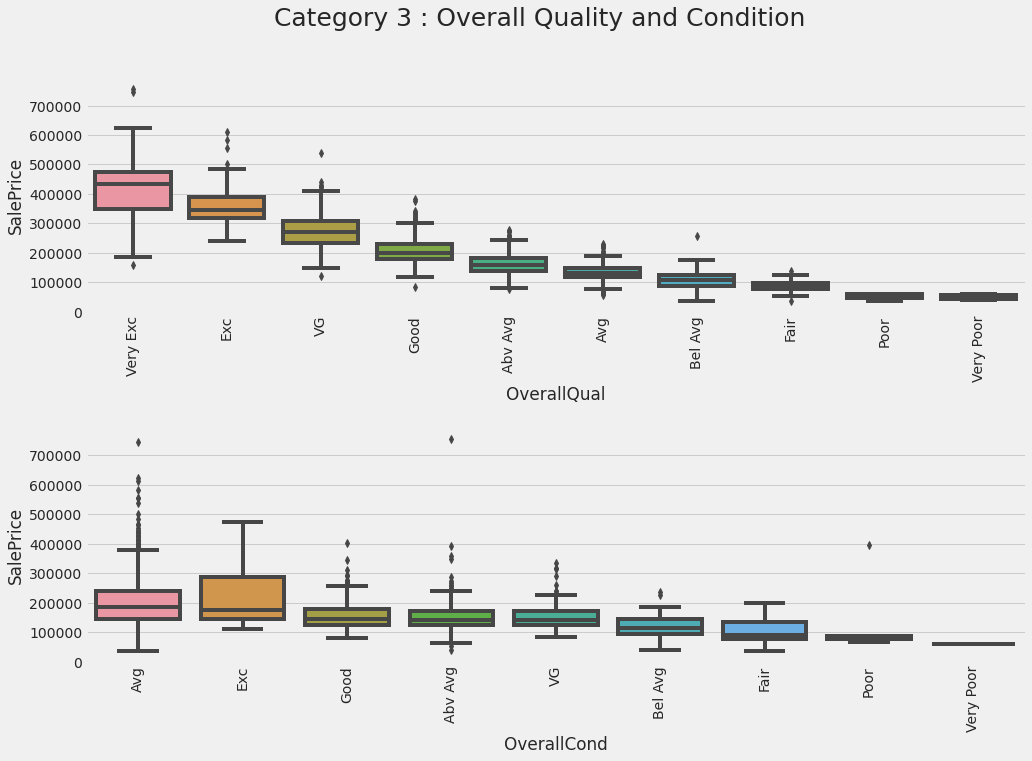

In [80]:
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,1,1)
table = df_new.groupby(['OverallQual'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df_new,x='OverallQual',y="SalePrice",order=table['OverallQual'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,1,2)
table = df_new.groupby(['OverallCond'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df_new,x='OverallCond',y="SalePrice",order=table['OverallCond'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig.suptitle("Category 3 : Overall Quality and Condition",fontsize=25);

* `Overall Quality` :- It's obvious that if overall quality of the property is good , the Price will be high and we can clearly see that in the above box plot.This tells us that Overall Quality is an important feature in predicting Sale Price of the house.The below distribution gives us a better look of the variation in price with the overall quality.
* `Overall Condition` :- Most of the houses are in average condition and very few are in excellent condition as seen in the box plot and the below distribution.Properties in average and excellent condition are having average price high and the properties in very bad condition will have low sale price.

In [81]:
fig = px.histogram(df_new, x="SalePrice", color='OverallQual',barmode="overlay",title="Overall Quality of the house")
fig.update_layout(height=500)
fig.show()

fig = px.histogram(df_new, x="SalePrice", color='OverallCond',barmode="overlay",title="Overall Condition of the house")
fig.update_layout(height=500)
fig.show()

<h1 style="text-align:center;">Category 4 :: Location and Style</h1>

In [82]:
cat2=['Neighborhood','Condition1', 'Condition2','Utilities','BldgType', 'HouseStyle']

**`Neighborhood`: Physical locations within Ames city limits**

**`Condition1`: Proximity to various conditions**

**`Condition2`: Proximity to various conditions (if more than one is present)**

**`Utilities`: Type of utilities available**

**`BldgType`: Type of dwelling**

**`HouseStyle`: Style of dwelling**

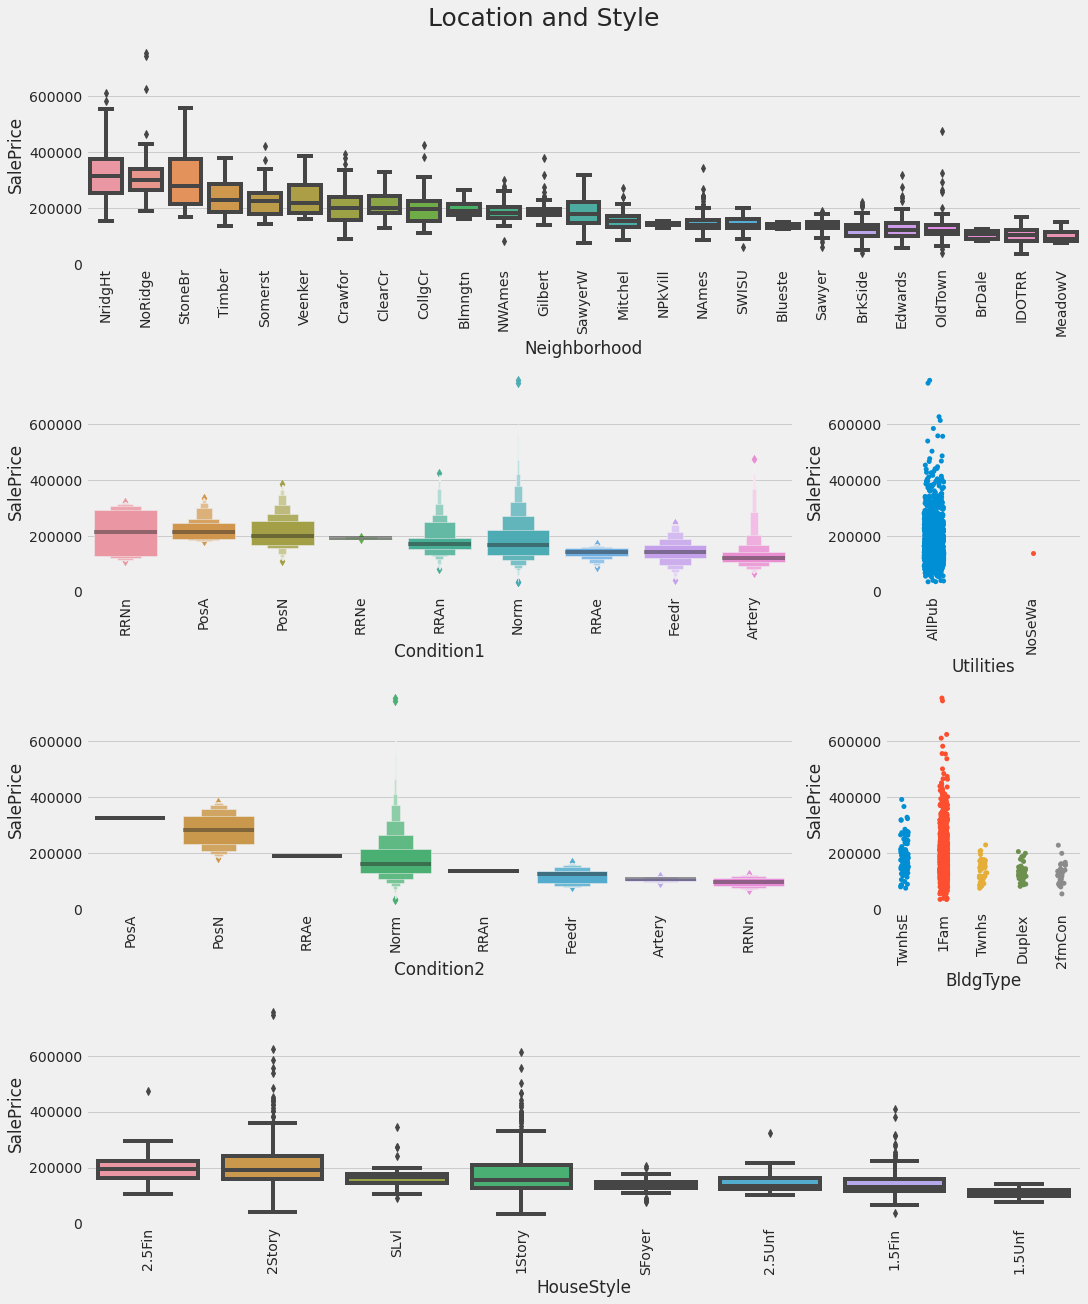

In [83]:
fig = plt.figure(constrained_layout=True,figsize=(15,18))
gs = GridSpec(4, 3, figure=fig)

plt.subplot(gs[0,:])
table = df.groupby(['Neighborhood'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='Neighborhood',y="SalePrice",order=table['Neighborhood'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:-1])
table = df.groupby(['Condition1'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=df,x='Condition1',y="SalePrice",order=table['Condition1'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,-1])
table = df.groupby(['Utilities'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.stripplot(data=df,x='Utilities',y="SalePrice",order=table['Utilities'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[2,:-1])
table = df.groupby(['Condition2'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=df,x='Condition2',y="SalePrice",order=table['Condition2'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[2,-1])
table = df.groupby(['BldgType'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.stripplot(data=df,x='BldgType',y="SalePrice",order=table['BldgType'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[3,:])
table = df.groupby(['HouseStyle'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='HouseStyle',y="SalePrice",order=table['HouseStyle'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig.suptitle("Location and Style",fontsize=25);

* `Building Type` :- Single family detached dwellings have higher sale price compared to duplex,two family houses and townhouse dwellings

* `Condition 1 and 2` :- In Condition 1 and 2 , close proximity to conditions like streets lowers the sale price and to railroads ,price is high.

* `House Styles` :- 2 Story and 1 Story finished house styles have highest sale price than unfinished properties which is obvious.

* `Neighborhood` :- We can see variation in sale price in different neighborhoods.From Mitchell neighborhoods , all the neighbors to the right are having consistently low price.
* The below table gives us a proper view of the neighborhoods and their average sale price.

In [84]:
table = df_new.groupby(['Neighborhood'],as_index=False)['SalePrice'].median()
table = table.sort_values(by='SalePrice',ascending=False)
table.style.background_gradient(cmap='Reds')

,Neighborhood,SalePrice
16,NridgHt,315000
15,NoRidge,301500
22,StoneBr,278000
23,Timber,228475
21,Somerst,225500
24,Veenker,218000
6,Crawfor,200624
4,ClearCr,200250
5,CollgCr,197200
0,Blmngtn,191000


* After Mitchel , all the neighbors are having sale price less than 1,40,000.
* And the least price for MeadowV neighborhood.


* `Utilities` :- There are four utilities given in the description of this dataset.But we can only two utilities are available in our dataset .
* 1) All Public utilities and 2) Electricity and Gas only
* Out of 1460 data , only one house is having Electricity and gas utility in our dataset with Sale Price 137500.
* Most of the properties with all public utilities have sale price between 1lakh to 2lakh.

<h1 style="text-align:center;">Category 5 :: Roofing,Foundation and housing exterior</h1>

**`RoofStyle`: Type of roof**
    
**`RoofMatl`: Roof material**
    
**`Exterior1st`: Exterior covering on house**
    
**`Exterior2nd`: Exterior covering on house (if more than one material)**
    
**`MasVnrType`: Masonry veneer type  (Masonry veneer walls consist of a single non-structural external layer of masonry, typically made of brick)**
    
**`Foundation`: Type of foundation**

In [85]:
cat3=['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrType', 'Foundation']

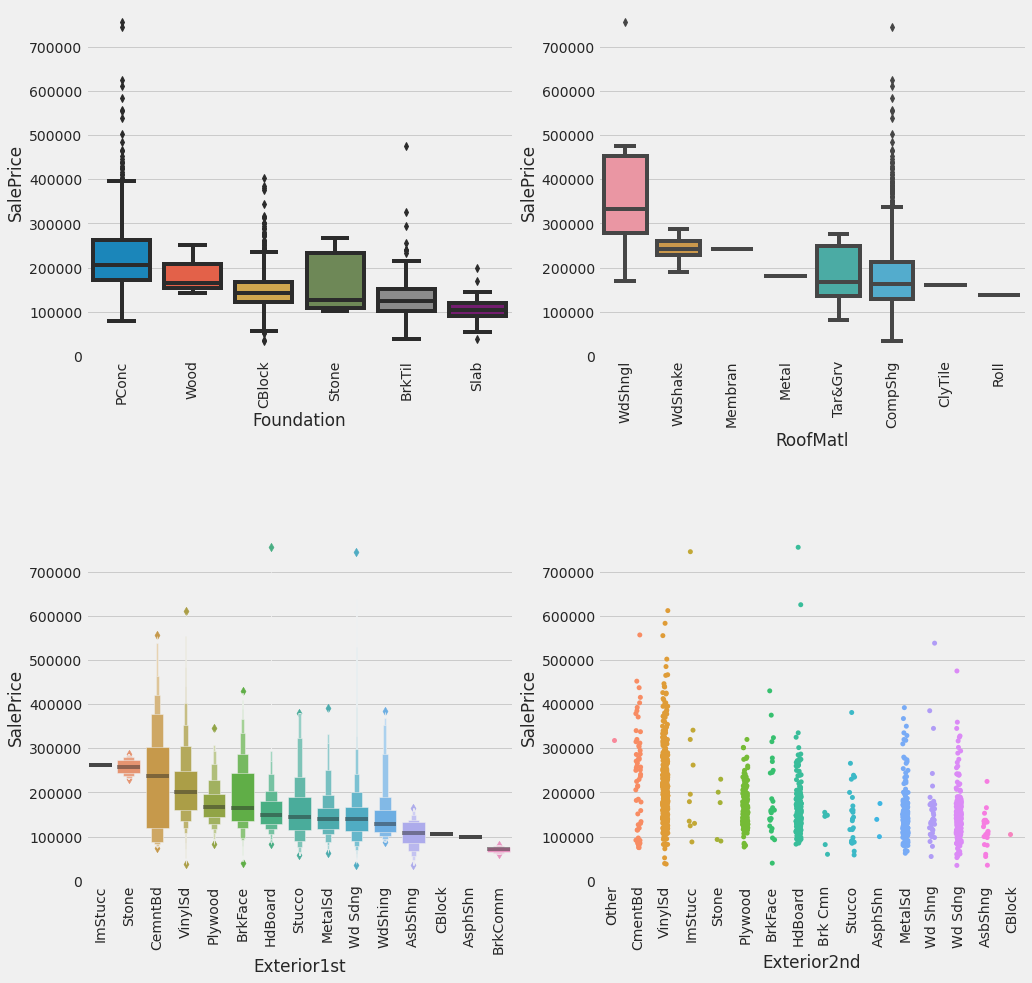

In [86]:
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,2,1)
table = df.groupby(['Foundation'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='Foundation',y="SalePrice",order=table['Foundation'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,2,2)
table = df.groupby(['RoofMatl'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='RoofMatl',y="SalePrice",order=table['RoofMatl'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,2,3)
table = df.groupby(['Exterior1st'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=df,x='Exterior1st',y="SalePrice",order=table['Exterior1st'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,2,4)
table = df.groupby(['Exterior2nd'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.stripplot(data=df,x='Exterior2nd',y="SalePrice",order=table['Exterior2nd'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig = px.histogram(df, x="SalePrice", color='RoofStyle',barmode="overlay",title='RoofStyle')
fig.update_layout(height=400)
fig.show()

fig = px.histogram(df, x="SalePrice", color='MasVnrType',barmode="overlay",title="Mason Veneer Type")
fig.update_layout(height=400)
fig.show()

* `Exterior 1st` :- We can see a difference in Sale Price in exterior covering of the house .
* Imitation Stucco,Stone,Cement Board coverings have high value in determining sale price ,while the lowest value is for common brick covering.

* `Exterior2nd` :- Having multiple materials changes the price of the house.Stone value has dropped while Cement board and Vinyl Siding are having almost same price.

* `Roof Styles` :- Most of the house are having Gable and Hip roof styles and average sale price of 1.5lakhs.
* The average highest sale price is for properties having Shed roof style and the lowest sale price.
    

In [87]:
table = df_new.groupby(['RoofStyle'],as_index=False)['SalePrice'].median()
table = table.sort_values(by='SalePrice',ascending=False)
table.style.background_gradient(cmap='Reds')

,RoofStyle,SalePrice
5,Shed,225000
0,Flat,185000
3,Hip,176500
4,Mansard,175000
1,Gable,160000
2,Gambrel,139000


* `Mason Veneer Types` :- Most of the properties are not having Masonry veneer walls and have low sale price.
Properties having masonry walls of Stone and Bricks have high value with Stone being highest.

In [88]:
table = df_new.groupby(['MasVnrType'],as_index=False)['SalePrice'].median()
table = table.sort_values(by='SalePrice',ascending=False)
table.style.background_gradient(cmap='Greys')

,MasVnrType,SalePrice
3,Stone,246839
1,BrkFace,181000
2,None,143125
0,BrkCmn,139000


* `Foundation` :- Houses with poured concrete foundation have highest sale price followed by wooden and concrete block.
* Slab foundation having the lowest value.

* `Roof Material` :- Almost all the properties in our data have standard shingle roof material with average sale price of 1,60,000.
* The highest average value is for wooden shingles materials and the lowest for roll roof materials.

<h1 style="text-align:center;">Category 6 :: Exterior Condition and Quality</h1>

**`ExterQual`: Evaluates the quality of the material on the exterior**
    
**`ExterCond`: Evaluates the present condition of the material on the exterior**

In [89]:
cat6=['ExterQual', 'ExterCond']

In [90]:
fig = px.histogram(df, x="SalePrice", color='ExterQual',barmode="overlay",title='Exterior Quality')
fig.update_layout(height=400)
fig.show()

fig = px.histogram(df, x="SalePrice", color='ExterCond',barmode="overlay",title="Exterior Condition")
fig.update_layout(height=400)
fig.show()

* `Exterior Quality` :- If the exterior quality is good or excellent , The price will be more .Most of the properties have average exterior quality and very few have excellent exterior quality.
* `Exterior Condition` :- Average,good and excellent exterior condition properties will have higher sale price.And here also most of the properties have average exterior condition and only 3 properties in our dataset have excellent exterior condition.

<h1 style="text-align:center;">Category 7 :: Basements</h1>

**`BsmtQual`: Evaluates the height of the basement**
    
**`BsmtCond`: Evaluates the general condition of the basement**
    
**`BsmtExposure`: Refers to walkout or garden level walls**
    
**`BsmtFinType1`: Rating of basement finished area**
    
**`BsmtFinType2`: Rating of basement finished area (if multiple types)**

In [91]:
cat7=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [92]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Box(y=df['SalePrice'],x=df['BsmtQual'],name='Basement Quality'),row=1,col=1)
fig.add_trace(go.Box(y=df['SalePrice'],x=df['BsmtExposure'],name='Basement Exposure'),row=1,col=2)
fig.update_layout( title_text="Basement Quality and Exposure",height=400)
fig.show()

fig = px.histogram(df, x="SalePrice", color='BsmtCond',barmode="overlay",height=400,title='Basement Condition')
fig.show()

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Violin(y=df['SalePrice'],x=df['BsmtFinType1'],name='Basement_Finish Type1 '),row=1,col=1)
fig.add_trace(go.Violin(y=df['SalePrice'],x=df['BsmtFinType2'],name='Basement_Finish Type2'),row=1,col=2)
fig.update_layout( title_text="Basement Finish Type 1 and 2",height=400)
fig.show()

* `Basement Quality` :- Here the Basement quality refers to height of the basement.So excellent means more than 100 inches and poor means less than 70 inches.
* So Properties with excellent and good basement quality will have higher sale price.
* `Basement Exposure` :- Basements with good exposure to garden or walkouts have higher sale price and properties with no basements or the ones which are not known have low sale price.
* Both of the above features help us in predicting Sale Price as we can see variation in Sale Price. 
* `Basement Condition` :- Average and Good condition have higher sale price as seen in other cases.
* `Basment finish type 1 and 2` :- Good and Average living quarters and unfinished basements have higher average sale price in both type 1 and type 2 and below average finishes will obviously have less value.


<h1 style="text-align:center;">Category 8 :: Heating and Air Conditioning</h1>

In [93]:
cat8=['Heating', 'HeatingQC', 'CentralAir','Electrical']

**`Heating`: Type of heating**

**`HeatingQC`: Heating quality and condition**
    
**`CentralAir`: Central air conditioning**
    
**`Electrical`: Electrical system**

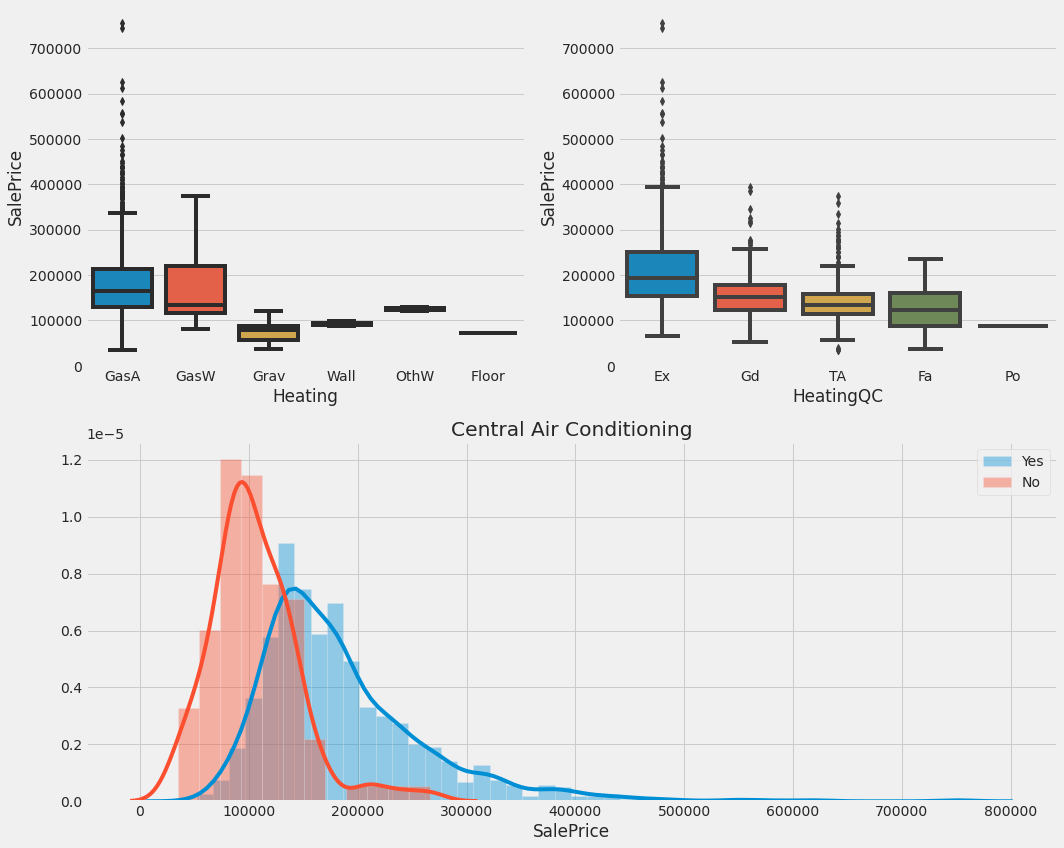

In [94]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True,figsize=(15,12))
gs = gridspec.GridSpec(2, 2)

plt.subplot(gs[0,0])
ax1 = sns.boxplot(data=df,x="Heating",y="SalePrice")

plt.subplot(gs[0,1])
ax1 = sns.boxplot(data=df,x="HeatingQC",y="SalePrice")

plt.subplot(gs[1,:])
sns.distplot(df[df['CentralAir']=='Y']['SalePrice'])
sns.distplot(df[df['CentralAir']=='N']['SalePrice'])
plt.legend('upper right' , labels = ['Yes','No'])
plt.xlabel("SalePrice")
plt.title("Central Air Conditioning")

px.histogram(df, x="SalePrice", color='Electrical',barmode="overlay",title="Electrical System")

* `Electrical` :- Most of the properties have standard circuit breakers and having highest average sale price of 170000.
* Properties with Poor fuse box system and mixed system have less than 10000 sale price.

* `Heating Quality` :- It can be clearly seen in the box plot and no need of explanation.
* `Heating` :- Heating in the wall or hot water / steam is associated with very low house prices. Gas formed warm air appears to drive a higher sales price.

* `Central AC` :- It's straightforward ,the properties which have Air conditioning will have higher price than the ones which dont have.

<h1 style="text-align:center;">Category 9 :: Internal Quality</h1>

**`KitchenQual`: Kitchen quality**
    
**`Functional`: Home functionality (Assume typical unless deductions are warranted)**
    
**`FireplaceQu`: Fireplace quality**

In [95]:
cat9=['KitchenQual', 'Functional','FireplaceQu']

In [96]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Violin(y=df['SalePrice'],x=df['FireplaceQu'],name='Fireplace Quality'),row=1,col=1)
fig.add_trace(go.Box(y=df['SalePrice'],x=df['KitchenQual'],name='Kitchen Quality'),row=1,col=2)
fig.update_layout( showlegend=True,title_text="Fireplace and Kitchen Quality")
fig.show()

fig = px.histogram(df, x="SalePrice", color='Functional',barmode="overlay",title="Functional")
fig.show()

* No need to study about kitchen and fireplace quality
* `Functional` :- Functional feature tells us about the home functionality.So we can see that typical functionality is seen in most of the properties in our dataset.
* Typical functionality having highest value for sale price and as functionality decreases , sale price also decreases.

<h1 style="text-align:center;">Category 10 :: Garage</h1>

**`GarageType`: Garage location**
    
**`GarageFinish`: Interior finish of the garage**
    
**`GarageCars`: Size of garage in car capacity**
    
**`GarageQual`: Garage quality**
    
**`GarageCond`: Garage condition**

In [97]:
#Category 8:- Garage
cat8=['GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond']

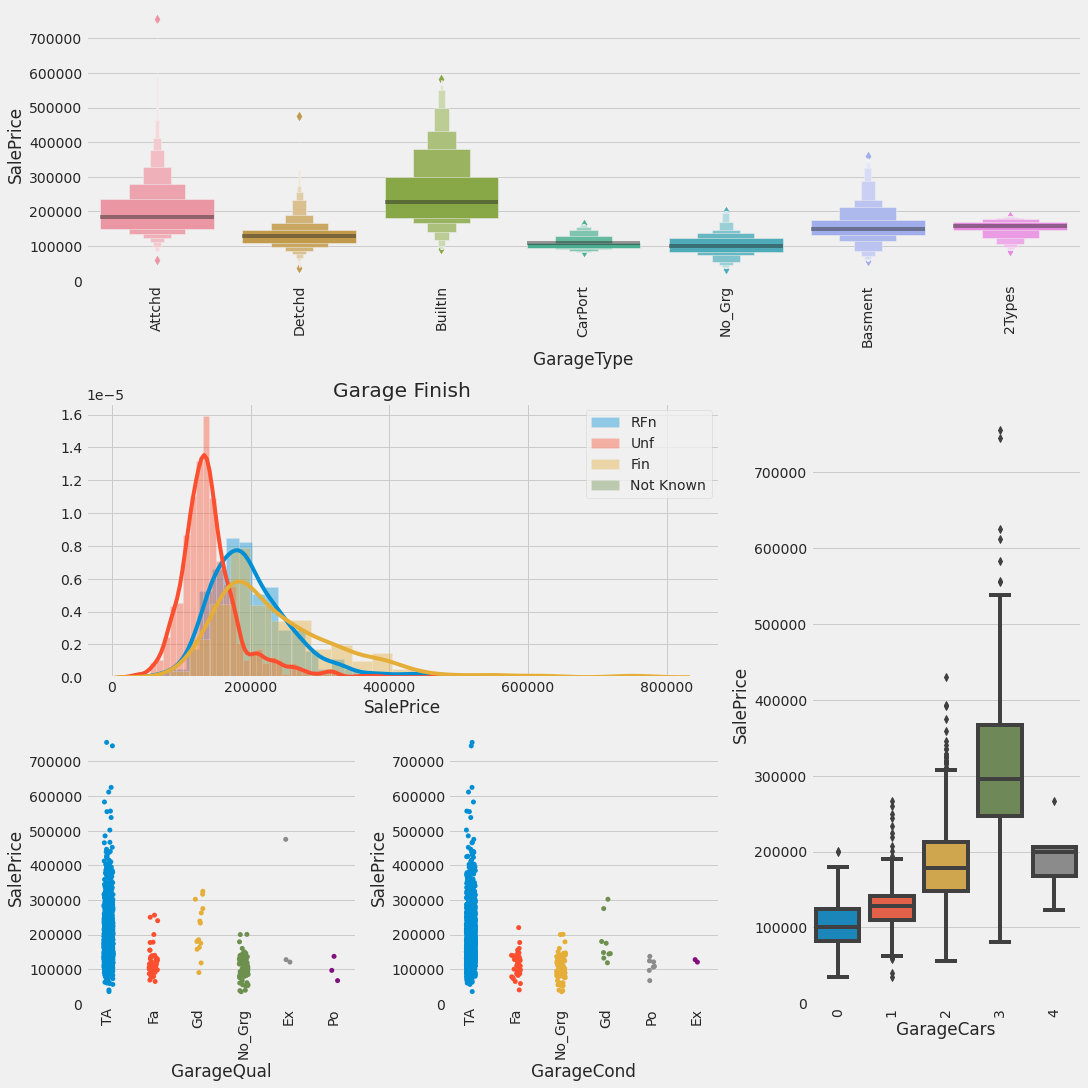

In [98]:
fig = plt.figure(constrained_layout=True,figsize=(15,15))
gs = GridSpec(3, 3, figure=fig)

plt.subplot(gs[0,:])
a1 = sns.boxenplot(data=df,x="GarageType",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:-1])
sns.distplot(df[df['GarageFinish']=='RFn']['SalePrice'])
sns.distplot(df[df['GarageFinish']=='Unf']['SalePrice'])
sns.distplot(df[df['GarageFinish']=='Fin']['SalePrice'])
sns.distplot(df[df['GarageFinish']=='Not Known']['SalePrice'])

plt.legend('upper right' , labels = ['RFn','Unf','Fin','Not Known'])
plt.xlabel("SalePrice")
plt.title("Garage Finish")

plt.subplot(gs[1:,-1])
a1 = sns.boxplot(data=df,x="GarageCars",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[-1,0])
a1 = sns.stripplot(data=df,x="GarageQual",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[-1,-2])
a1 = sns.stripplot(data=df,x="GarageCond",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);



* Now we are looking at the garage in our properties.
* `Garage Type` :- Houses with built in or attached garages tend to have the highest prices. Those without a garage or a car port tend to have the lowest price.
* `Garage Finish` :- Finished and roughly finished garages account for higher sale price than unfinished ones.And the properties which dont have a garage have the lowest price.
* `GarageCars` :- Here garage cars refers to size of garage in car capacity.So higher the number more the Sale Price.


<h1 style="text-align:center;">Category 11 :: Outdoors</h1>

In [99]:
cat9=['PavedDrive']

**`PavedDrive`: Paved driveway**

In [100]:
px.histogram(df, x="SalePrice", color='PavedDrive',barmode="overlay",title="Paved Driveway")

* `Paved Driveway` :- Most of the houses have Paved driveway in our dataset and these properties have highest sale price than partial and dirt/gravel driveways.

<h1 style="text-align:center;">Category 12 :: Sale Type and Condition</h1>

In [101]:
cat10 = ['SaleType','SaleCondition']

**`SaleType`: Type of sale**
    
**`SaleCondition`: Condition of sale**

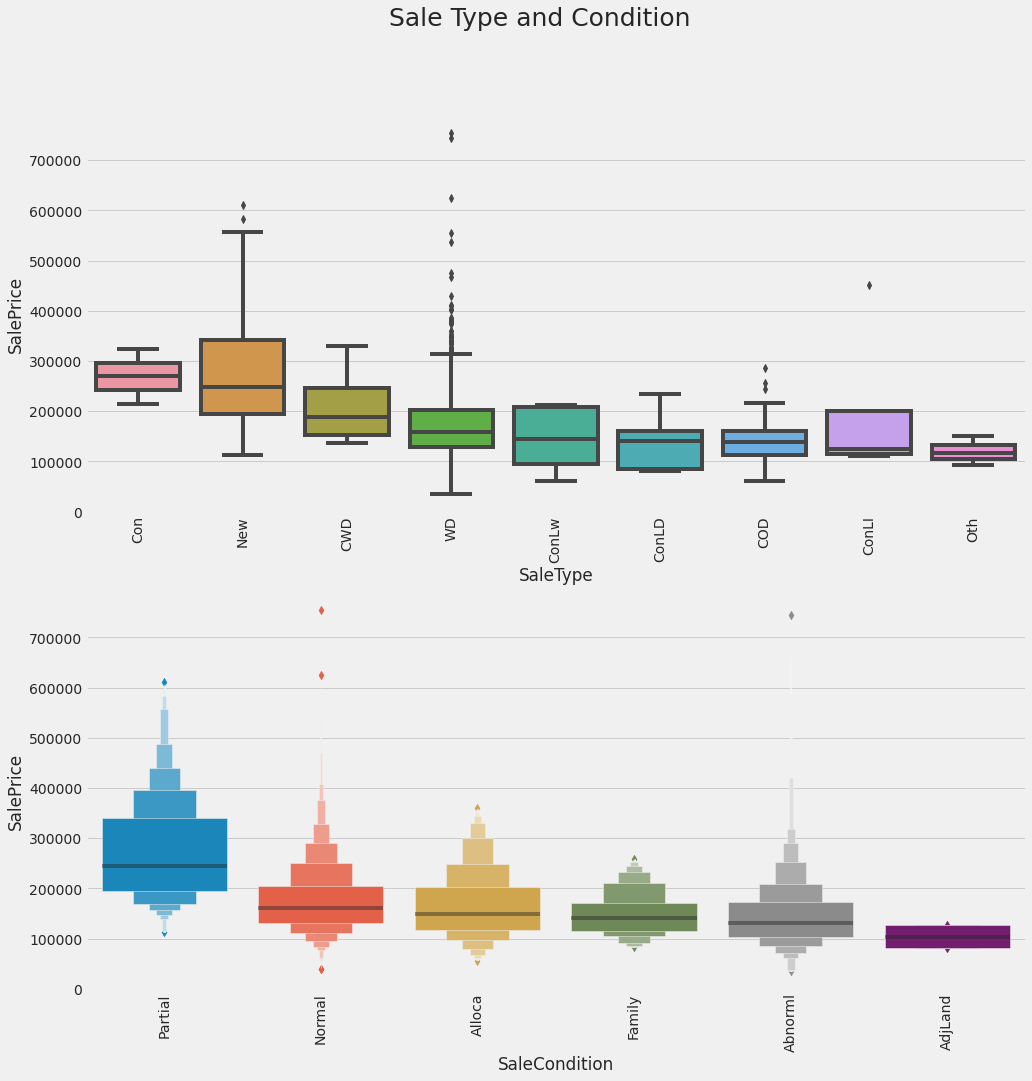

In [102]:
fig = plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
table = df.groupby(['SaleType'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='SaleType',y="SalePrice",order=table['SaleType'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,1,2)
table = df.groupby(['SaleCondition'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=df,x='SaleCondition',y="SalePrice",order=table['SaleCondition'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig.suptitle("Sale Type and Condition",fontsize=25);

* Both the variables above exhibit variation in sales price across the levels.
* `Sale Type` :- Most of the properties are on warranty deed sale.The manor in which the house is sold appears to have different price ranges.
* `Sale Condition` :- If the house to be sold is in partial or normal condition , the price will definitely be higher than the rest of the conditions.

Based on the analysis of the above categorical features , we can conclude that the following features are important in predicting Sale Price
<ol>
<li>MSSubClass and MSZoning.</li>
<li>All the Quality features , as the houses with average ,good,excellent quality features will have higher Sale Price.</li>
<li>Fireplaces and Garage Cars, more the number , higher the Sale Price.</li>
<li>We also saw variation in Basement Exposure.</li>
<li>And lastly Sale Type and Sale condition are also one of the important features..</li>
</ol>


# Datetime Features

* We have four year features in our dataset.
<ol>
<li>YearBuilt</li>
<li>YearRemodAdd</li>
<li>GarageYrBlt</li>
<li>YrSold</li>
</ol>
* We will analyze these features with Sale Price and try to gather some information.

In [103]:
year_features = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']

* Line plot that tells us the variation of each year with Sale Price.

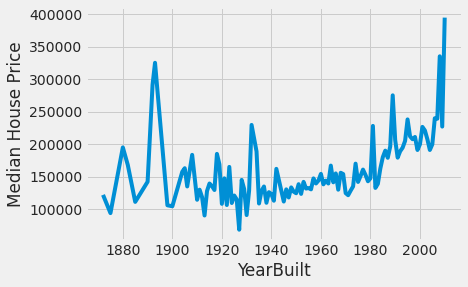

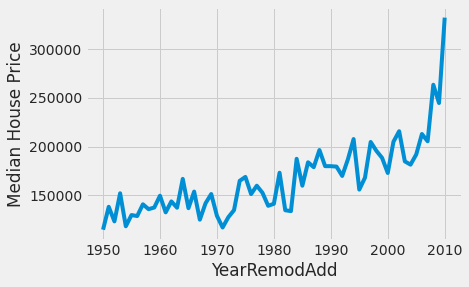

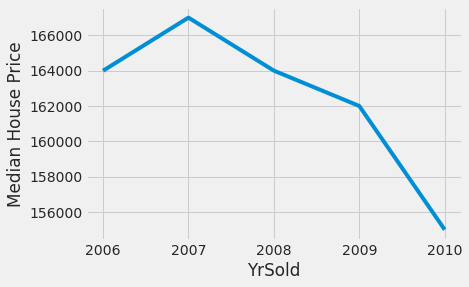

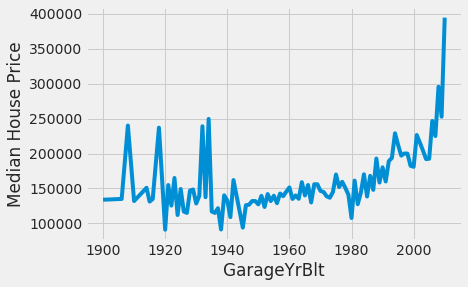

In [104]:
year_features = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']

for feature in year_features:
    ax = df.groupby([feature])['SalePrice'].median().plot()
    plt.ylabel("Median House Price")
    plt.show()

* We can see that the houses and garage which were built and remoddeled during 90s have less Sale Price than the newer ones.
* With every year , House price increases.
* But if see ,Year Sold feature the Price falls down with each year which is strange.
* Let's do some further analysis on these features.

* Due to the strange behaviour in Year Sold , we subtract each feature with Year Sold.
* i.e We are subtracting the year when the house was built with the year it was sold and comparing it with the Sale price. 

In [105]:
data=df.copy()
data['Sold-Built'] = data['YrSold'] - data['YearBuilt']
fig=px.scatter(data,x="Sold-Built",y="SalePrice",width=700)
fig.show()

data=df.copy()
data['Sold-Remodelled'] = data['YrSold'] - data['YearRemodAdd']
fig=px.scatter(data,x="Sold-Remodelled",y="SalePrice",width=700)
fig.show()

data=df.copy()
data['Sold-GarageBuilt'] = data['YrSold'] - data['GarageYrBlt']
fig=px.scatter(data,x="Sold-GarageBuilt",y="SalePrice",width=700)
fig.show()

* This clearly shows that the more the house is old , less is the Sale Price.

### That's it we are done with the analysis of all the features.

### Now we'll make a predictive model for predicting Sale Price.

* For this section ,we create a separate dataset.

In [106]:
import copy
dataset = df.copy()

# Log Transformation of skewed values.

* As seen in the skewness , there are some features with highly skewed values.
* As our target feature is a continuous variable , we'll be using regression algorithms for prediction.
* And for regression , it is convenient to transform highly skewed variables into a more normalized dataset.

* Before that we need to convert few features datatypes back to int from object that we had change in the start.

In [107]:
object_to_int = ['MSSubClass','OverallQual','OverallCond','GarageCars']

for feature in object_to_int:
    dataset[feature] = dataset[feature].astype(int)

In [108]:
#Similarly in test
#MSSubClass --> object to int

test['MSSubClass'] = test['MSSubClass'].astype(int)
test['OverallQual'] = test['OverallQual'].astype(int)
test['OverallCond'] = test['OverallCond'].astype(int)

In [109]:
#This step we'll extract the features from the dataset with high skewness for applying log transformation.

datetime=['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']

#Extracting continuous variables from the dataset
continuous=[]
for col in dataset.columns:
    if dataset[col].dtype!='O' and len(dataset[col].unique()) >16 and col not in datetime:
        continuous.append(col)
        
#Extracting features with skewness more than and less than zero
skewed_features=[]
for col in continuous:
    if dataset[col].skew()>0 or dataset[col].skew()<0:
        skewed_features.append(col)
        
#Creating a final list of features for applying log transformation
apply_log=[]
for col in skewed_features:
    if 0 not in dataset[col].unique():
        apply_log.append(col)
        
        
#Before log transformation
print("Before Log Transformation........................")
for col in apply_log:
    print("{} --- {}".format(col,dataset[col].skew()))
    
#Applying log transformation
for feature in apply_log:
    dataset[feature]=np.log(dataset[feature])
    
#After log transformation
print("\nAfter Log Transformation.........................")
for col in apply_log:
    print("{} --- {}".format(col,dataset[col].skew()))

Before Log Transformation........................
LotFrontage --- 2.4091466665496006
LotArea --- 12.207687851233496
1stFlrSF --- 1.3767566220336365
GrLivArea --- 1.3665603560164552
SalePrice --- 1.8828757597682129

After Log Transformation.........................
LotFrontage --- -0.9091148013817885
LotArea --- -0.1379938086958118
1stFlrSF --- 0.07915695223960692
GrLivArea --- -0.006995182187690808
SalePrice --- 0.12133506220520406


* We can see the skewness has reduced after applying log transformation.
* Look at the distribution of these five features.

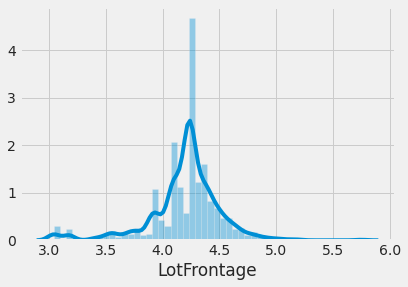

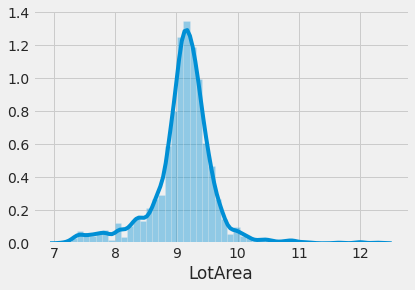

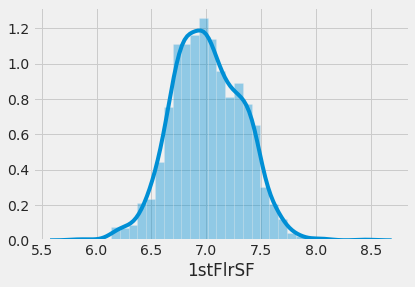

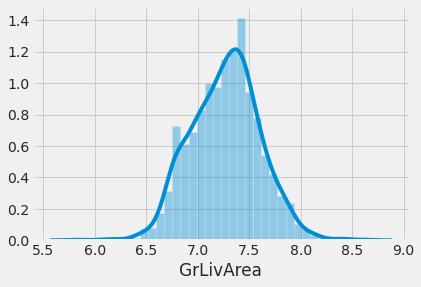

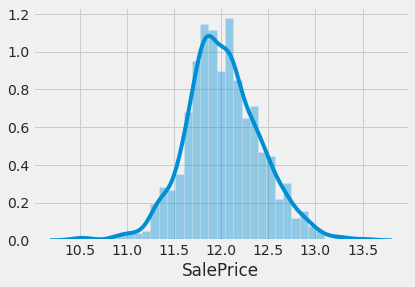

In [110]:
for feature in apply_log:
    fig = sns.distplot(dataset[feature])
    plt.show()

# Next step :- Label encoding

* It is important to convert the categorical text data into model-understandable numerical data

In [111]:
#Extracting all the categorical data to be encoded into numerical data
categorical = []

for col in dataset.columns:
    if dataset[col].dtype=='O':
        categorical.append(col)

In [112]:
##Label Encoding
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

label_encoders = {}
for column in categorical:
    label_encoders[column] = LabelEncoder()
    dataset[column] = label_encoders[column].fit_transform(dataset[column])

In [113]:
##Label Encoding for test dataset
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

label_encoders = {}
for column in categorical:
    label_encoders[column] = LabelEncoder()
    test[column] = label_encoders[column].fit_transform(test[column])

In [114]:
'''for feature in categorical:
    #for train
    labels_ordered=dataset.groupby([feature])['SalePrice'].median().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)
    
    #same for test
    labels_ordered=test.groupby([feature])['SalePrice'].median().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    test[feature]=test[feature].map(labels_ordered)'''

"for feature in categorical:\n    #for train\n    labels_ordered=dataset.groupby([feature])['SalePrice'].median().sort_values().index\n    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}\n    dataset[feature]=dataset[feature].map(labels_ordered)\n    \n    #same for test\n    labels_ordered=test.groupby([feature])['SalePrice'].median().sort_values().index\n    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}\n    test[feature]=test[feature].map(labels_ordered)"

* If we look at the categorical data in our dataset and test , we can see all the labels are encoded into numerical data.

In [115]:
dataset[categorical]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,2,6,3,1,2,5,5,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,3,6,5,1,2,5,5,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,2,6,5,1,2,5,5,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,2,6,2,5,3,5,5,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,2,6,5,1,2,5,5,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,3,6,5,1,2,5,5,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,3,2,5,1,3,5,5,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,2,6,2,1,2,5,5,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,2,6,3,1,3,5,5,2,8,4


In [116]:
test[categorical]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2,1,3,3,0,4,0,12,1,2,...,3,6,3,1,3,4,5,2,8,4
1,3,1,0,3,0,0,0,12,2,2,...,2,6,3,1,3,4,5,2,8,4
2,3,1,0,3,0,4,0,8,2,2,...,3,6,5,1,0,4,5,2,8,4
3,3,1,0,3,0,4,0,8,2,2,...,2,6,2,1,0,4,5,2,8,4
4,3,1,0,1,0,4,0,22,2,2,...,2,6,3,1,2,4,5,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1,3,3,0,4,0,10,2,2,...,3,6,3,6,1,2,3,2,8,4
1455,4,1,3,3,0,4,0,10,2,2,...,3,6,3,4,3,4,5,2,8,0
1456,3,1,3,3,0,4,0,11,2,2,...,3,6,5,5,3,4,5,2,8,0
1457,3,1,3,3,0,4,0,11,2,2,...,3,6,3,6,1,2,3,2,8,4


# Feature Scaling

* It is important to scale all the features so that each feature contributes approximately proportionately to the final Sale Price.

* There are two types of popular feature scaling methods :-
* 1) Standard Scaler
* 2) MinMax Scaler
*  StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. ... StandardScaler makes the mean of the distribution 0.
* MinMaxScaler shrinks the range such that the range is now between 0 and 1.
* We can use any one of them , in this exercise we'll go with MinMaxScaler.

In [117]:
#Separating target feature and independent variables from the dataset.

y=dataset['SalePrice']
X=dataset.drop(columns=['SalePrice'],axis=1)

columns_x=X.columns

In [118]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X=scaler.fit_transform(X)

X = pd.DataFrame(X,columns=[columns_x])

In [119]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.75,0.418208,0.366344,1.0,1.0,1.0,0.0,1.0,0.0,...,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.8
1,0.000000,0.75,0.495064,0.391317,1.0,1.0,1.0,0.0,0.5,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,0.8
2,0.235294,0.75,0.434909,0.422359,1.0,0.0,1.0,0.0,1.0,0.0,...,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,0.8
3,0.294118,0.75,0.388581,0.390295,1.0,0.0,1.0,0.0,0.0,0.0,...,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,1.0,0.0
4,0.235294,0.75,0.513123,0.468761,1.0,0.0,1.0,0.0,0.5,0.0,...,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,0.8


* Similarly for test dataset

In [120]:
columns_test = test.columns

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
test=scaler.fit_transform(test)

test = pd.DataFrame(test,columns=[columns_test])

In [121]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000000,0.50,0.329609,0.184147,1.0,1.0,1.000000,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0,1.0,0.8
1,0.000000,0.75,0.335196,0.232124,1.0,0.0,1.000000,0.0,0.0,0.0,...,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0,1.0,0.8
2,0.235294,0.75,0.296089,0.224197,1.0,0.0,1.000000,0.0,1.0,0.0,...,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0,1.0,0.8
3,0.235294,0.75,0.318436,0.154326,1.0,0.0,1.000000,0.0,1.0,0.0,...,0.048518,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0,1.0,0.8
4,0.588235,0.75,0.122905,0.064121,1.0,0.0,0.333333,0.0,1.0,0.0,...,0.110512,0.0,0.0,0.250000,0.0,0.000000,0.000000,1.0,1.0,0.8


* All the data has been scaled between 0 and 1.

# Train Test Split

### Splitting the data in train and test datasets for model prediction.

In [122]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=0)

* As there are a lot of features in our dataset , we'll select the most important features for our model.

# Feature Selection

In [123]:
# Using SelectFromModel with lasso for selecting best features.

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [124]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]
print(selected_feat)

MultiIndex([(     'LotShape',),
            (     'BldgType',),
            (  'OverallQual',),
            ( 'YearRemodAdd',),
            (     'BsmtQual',),
            ( 'BsmtExposure',),
            ( 'BsmtFinType1',),
            (    'HeatingQC',),
            (   'CentralAir',),
            (     '1stFlrSF',),
            (    'GrLivArea',),
            ( 'BsmtFullBath',),
            (     'FullBath',),
            (  'KitchenQual',),
            (   'Fireplaces',),
            (   'GarageType',),
            ( 'GarageFinish',),
            (   'GarageCars',),
            (   'GarageArea',),
            (   'PavedDrive',),
            ('SaleCondition',)],
           )


In [125]:
#Taking only selected features from training dataset

X_train = X_train[selected_feat].reset_index(drop=True)

In [126]:
X_train.head()

,LotShape,BldgType,OverallQual,YearRemodAdd,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,1stFlrSF,...,BsmtFullBath,FullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,SaleCondition
0,1.0,0.0,0.666667,0.800000,0.5,0.75,0.333333,0.0,1.0,0.435974,...,0.333333,0.666667,0.666667,0.000000,0.166667,0.666667,0.50,0.454866,1.0,0.8
1,1.0,0.0,0.555556,0.783333,0.5,0.50,0.333333,0.0,1.0,0.511654,...,0.333333,0.333333,0.666667,0.333333,0.166667,1.000000,0.50,0.303949,1.0,0.8
2,0.0,0.0,0.444444,0.966667,1.0,0.25,0.166667,0.5,1.0,0.357038,...,0.333333,0.333333,1.000000,0.000000,1.000000,0.333333,0.00,0.000000,1.0,0.8
3,1.0,0.0,0.555556,0.000000,1.0,0.50,0.833333,1.0,1.0,0.278935,...,0.000000,0.333333,1.000000,0.000000,0.833333,1.000000,0.25,0.197461,0.5,0.8
4,1.0,0.0,0.111111,0.000000,1.0,0.75,0.833333,1.0,0.0,0.102585,...,0.000000,0.333333,0.333333,0.000000,0.833333,1.000000,0.25,0.173484,0.0,0.8


In [127]:
#Similarly for testing dataset

X_test=X_test[selected_feat]

In [128]:
X_test.head()

,LotShape,BldgType,OverallQual,YearRemodAdd,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,1stFlrSF,...,BsmtFullBath,FullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,SaleCondition
529,0.0,0.00,0.555556,0.416667,1.0,0.75,0.833333,1.0,1.0,0.764014,...,0.333333,1.000000,1.000000,0.666667,0.166667,0.666667,0.50,0.341326,1.0,0.4
491,1.0,0.00,0.555556,0.000000,1.0,0.75,0.166667,1.0,1.0,0.398758,...,0.333333,0.333333,0.333333,0.666667,0.166667,1.000000,0.25,0.169252,1.0,0.8
459,0.0,0.00,0.444444,0.000000,1.0,0.75,0.500000,1.0,1.0,0.406964,...,0.333333,0.333333,0.666667,0.333333,0.833333,1.000000,0.25,0.248237,1.0,0.8
279,1.0,0.00,0.666667,0.450000,0.5,0.75,0.166667,0.0,1.0,0.469855,...,0.000000,0.666667,1.000000,0.333333,0.166667,0.000000,0.50,0.356135,1.0,0.8
655,1.0,0.75,0.555556,0.350000,1.0,0.75,1.000000,1.0,1.0,0.171149,...,0.000000,0.333333,1.000000,0.000000,0.833333,1.000000,0.25,0.186178,1.0,0.6


In [129]:
#For test dataset

test = test[selected_feat]
test.head()

,LotShape,BldgType,OverallQual,YearRemodAdd,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,1stFlrSF,...,BsmtFullBath,FullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,SaleCondition
0,1.0,0.0,0.444444,0.183333,1.0,0.75,0.833333,1.0,1.0,0.104309,...,0.0,0.25,1.000000,0.00,0.166667,1.000000,0.2,0.490591,1.0,0.8
1,0.0,0.0,0.555556,0.133333,1.0,0.75,0.000000,1.0,1.0,0.196672,...,0.0,0.25,0.666667,0.00,0.166667,1.000000,0.2,0.209677,1.0,0.8
2,0.0,0.0,0.444444,0.800000,0.5,0.75,0.333333,0.5,1.0,0.111135,...,0.0,0.50,1.000000,0.25,0.166667,0.000000,0.4,0.323925,1.0,0.8
3,0.0,0.0,0.555556,0.800000,1.0,0.75,0.333333,0.0,1.0,0.110708,...,0.0,0.50,0.666667,0.25,0.166667,0.000000,0.4,0.315860,1.0,0.8
4,0.0,1.0,0.777778,0.700000,0.5,0.75,0.000000,0.0,1.0,0.186220,...,0.0,0.50,0.666667,0.00,0.166667,0.666667,0.4,0.340054,1.0,0.8


# Model Building



* Linear Regression
* Gradient Boosting
* XGBoost Regressor

# Linear Regression

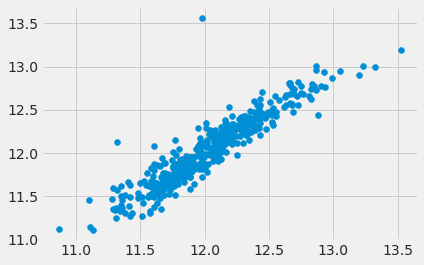

MAE: 0.1025108588794794
MSE: 0.023020141010758246
RMSE: 0.15172389729623428

Accuracy : 0.8510130611118579


In [130]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lm = LinearRegression()

#Fitting linear model on train dataset
lm.fit(X_train,y_train)

#Test dataset prediction
lm_predictions = lm.predict(X_test)

#Scatterplot
plt.scatter(y_test, lm_predictions)
plt.show()

#Evaluation
print("MAE:", metrics.mean_absolute_error(y_test, lm_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lm_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_predictions)))

#Accuracy
print("\nAccuracy : {}".format(lm.score(X_test,y_test)))


* Accuracy of 87% is very less with linear regression.

# Gradient Boosting Regressor

In [131]:
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
from sklearn.model_selection import cross_val_score,GridSearchCV  #Additional scklearn functions and Performing grid search
from sklearn.metrics import mean_absolute_error,mean_squared_error 

* Define a function that helps us in creating GBM models and perform cross validation.
* To understand more in detail about gradient boosting , please refer https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [132]:
def modelfit(alg, train,target,test,target_test, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(train, target)
        
    #Predict training set:
    train_predictions = alg.predict(train)
    test_predictions = alg.predict(test)
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, train, target, cv=cv_folds)
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy on train: {}".format(alg.score(train, target)))
    print ("Accuracy on test: {}".format(alg.score(test, target_test)))
    print("Mean absolute error : {}".format(mean_absolute_error(target_test,test_predictions)))
    print("Mean squared error : {}".format(mean_squared_error(target_test,test_predictions)))
    print("Root mean squared error : {}".format(np.sqrt(mean_squared_error(target_test,test_predictions))))
    
    
    if performCV:
        print ("CV Score : Mean - {} | Std - {} | Min - {} | Max - {}".format(np.mean(cv_score),np.std(cv_score),
                                                                              np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feature_imp=alg.feature_importances_.tolist()
        feature_columns=list(train.columns)
        Import_Df = pd.DataFrame({'Feature': list(train.columns),
                   'Importance': alg.feature_importances_})
        Import_Df = Import_Df.sort_values(by='Importance',ascending=False)
        
        fig=plt.figure(figsize=(15,10))
        fig = sns.barplot(data=Import_Df,x='Feature',y='Importance')
        plt.xticks(rotation=90)
        plt.title("Feature Importances",fontsize=20)
        plt.xlabel("Feature",fontsize=15)
        plt.ylabel("Importances",fontsize=15)
        plt.show()


Model Report
Accuracy on train: 0.9378600481610935
Accuracy on test: 0.8897523807184908
Mean absolute error : 0.09584620674222617
Mean squared error : 0.017034484773636255
Root mean squared error : 0.13051622417782494
CV Score : Mean - 0.850412831536031 | Std - 0.02145031142756898 | Min - 0.8172560247651727 | Max - 0.8748329369721971


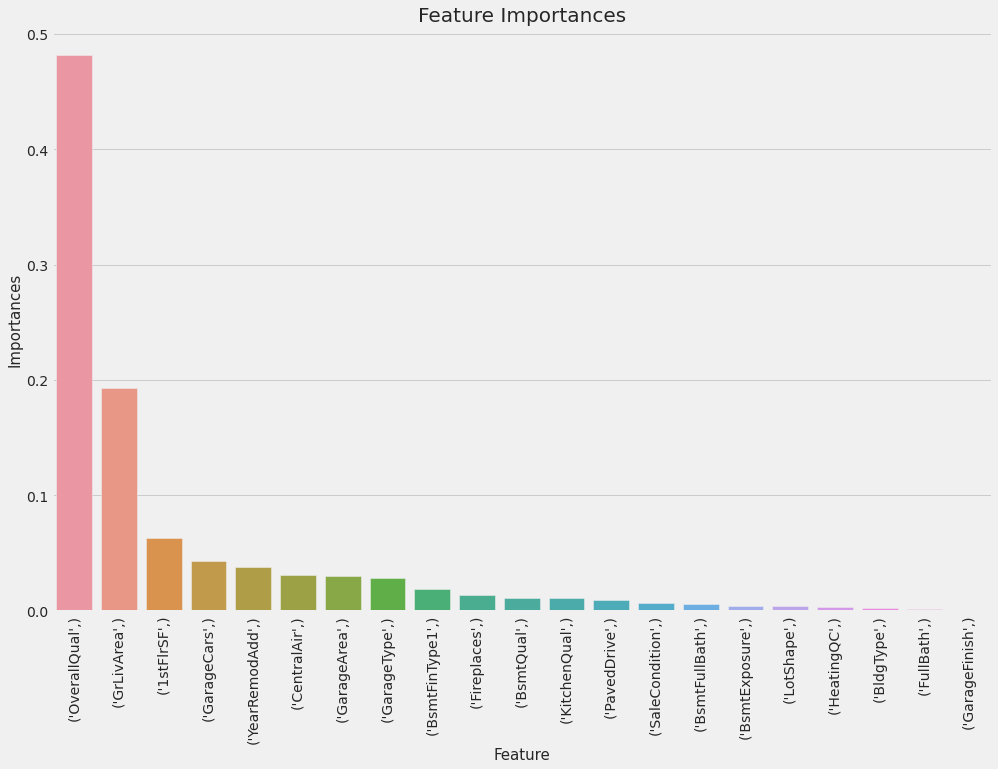

In [133]:
#Baseline model

gbm0 = GradientBoostingRegressor(random_state=5)
modelfit(gbm0,X_train,y_train,X_test,y_test)

* With no parameters , we get a good accuracy of 95% on train dataset and mean cv score of 0.88.
* Let's try increasing this with parameter tuning.

# Hyperparameter tuning

#### 1) Tuning number of estimators

In [134]:
#We take range of estimators from 1000 to 4000 with step of 1000.
#Take as low as learning rate for the model.

param_test1 = {'n_estimators':range(1000,4000,1000)}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.05, min_samples_split=10,min_samples_leaf=15,max_depth=4,max_features='sqrt',random_state=5), 
param_grid = param_test1,iid=False, cv=5)
gsearch1.fit(X_train,y_train)

gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.68620572, 1.28502183, 1.94995847]),
  'std_fit_time': array([0.01469546, 0.01010537, 0.00611861]),
  'mean_score_time': array([0.0073988 , 0.01160588, 0.01716104]),
  'std_score_time': array([0.00018364, 0.00040861, 0.00038699]),
  'param_n_estimators': masked_array(data=[1000, 2000, 3000],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 1000},
   {'n_estimators': 2000},
   {'n_estimators': 3000}],
  'split0_test_score': array([0.82136601, 0.81627928, 0.81180879]),
  'split1_test_score': array([0.84477062, 0.83327093, 0.82788932]),
  'split2_test_score': array([0.86244754, 0.85355398, 0.84903654]),
  'split3_test_score': array([0.84888793, 0.83208584, 0.82330015]),
  'split4_test_score': array([0.86884882, 0.86481409, 0.860462  ]),
  'mean_test_score': array([0.84926418, 0.84000082, 0.83449936]),
  'std_test_score': array([0.01646815, 0.01714664, 0.01771646]),
  'rank_test_score':

* As we can see , we got 1000 as optimal value for number of estimators.
* Further more tuning max_depth and min_samples_split


* Similarly , we can tune other parameters for better accuracy.
* Fitting the model again for checking any improvement in accuracy.


Model Report
Accuracy on train: 0.9790558501578108
Accuracy on test: 0.8732149054831095
Mean absolute error : 0.09881368647147382
Mean squared error : 0.019589708840399733
Root mean squared error : 0.1399632410327788
CV Score : Mean - 0.854736816967326 | Std - 0.019812565676627834 | Min - 0.8190589561652277 | Max - 0.8768530644453055


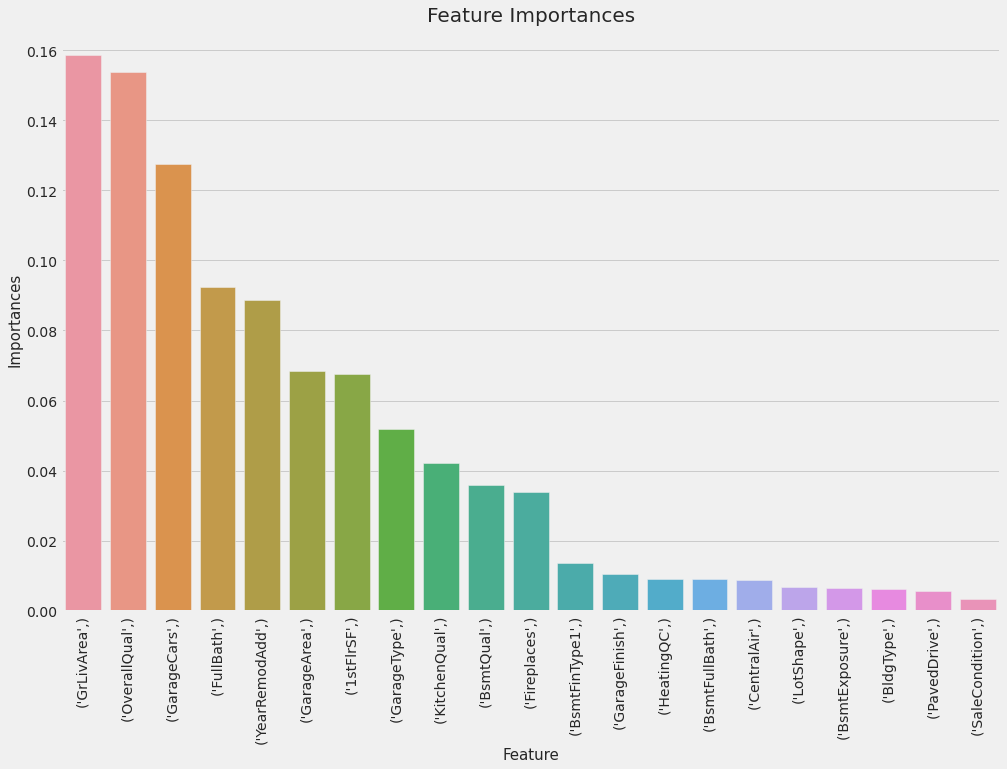

In [135]:
gbm1 = GradientBoostingRegressor(random_state=5,n_estimators=1000,learning_rate=0.05,
                                max_depth=9,min_samples_split=17,max_features='sqrt',
                                min_samples_leaf=13,loss='huber')
modelfit(gbm1,X_train,y_train,X_test,y_test)

* Now our model is able to derive value from many more variables.
* We can see a better accuracy in our training dataset with hyperparameter tuning.
* Although our test accuracy has decreased.

* Prediction on test dataset

In [136]:
gbm_predictions = gbm1.predict(test)
gbm_predictions


array([11.42366219, 11.52710932, 11.7016096 , ..., 11.62804513,
       11.41887602, 11.9041564 ])

# XGBoost Regressor

In [137]:
from xgboost import XGBRegressor

In [138]:
xgb0 = XGBRegressor(n_estimators=1000, learning_rate=0.05, gamma=0, subsample=0.75,max_depth=7,random_state=5,
                   min_child_weight=1,colsample_bytree=0.8)


Model Report
Accuracy on train: 0.9999687874234288
Accuracy on test: 0.8828081824220493
Mean absolute error : 0.09921184736487386
Mean squared error : 0.018107440733291007
Root mean squared error : 0.134563890896819
CV Score : Mean - 0.8560354537732671 | Std - 0.02009030281492526 | Min - 0.8210507998076986 | Max - 0.8777771617391399


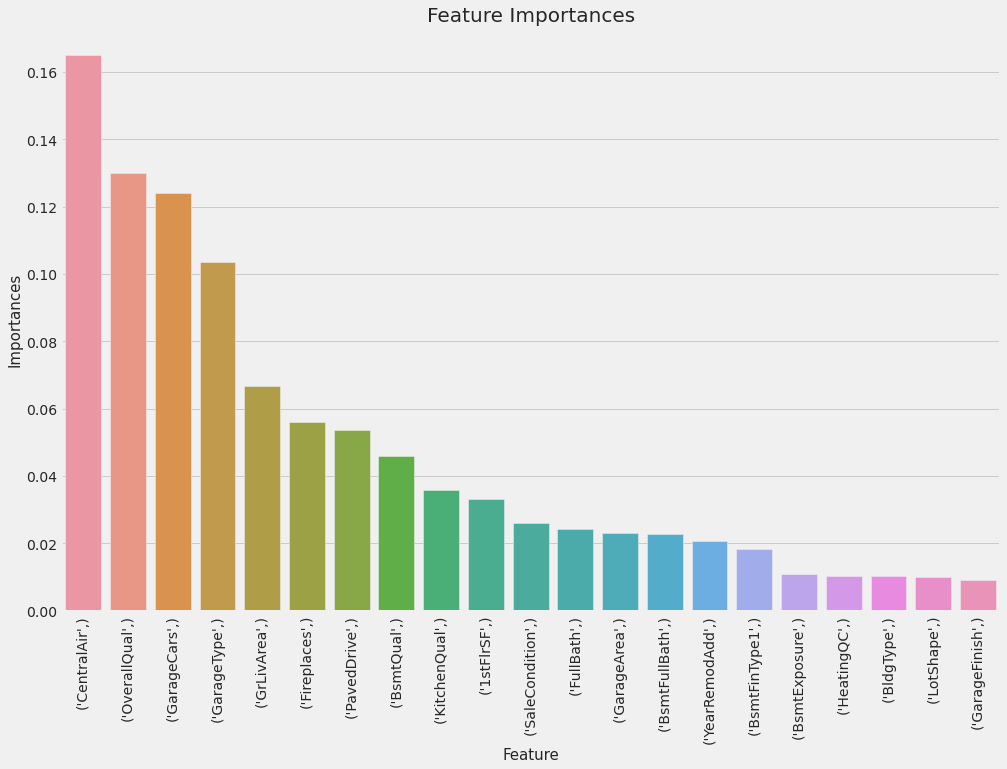

In [139]:
modelfit(xgb0,X_train,y_train,X_test,y_test)

*  We get the best accuracy with XGBoost model of 99% for our training dataset.


* Final prediction with XGBoost on test dataset.
* Using np.exp for Inverse log transformation on price .


In [140]:
xgb_prediction = xgb0.predict(test)
xgb_prediction

array([11.431725, 11.613248, 11.594603, ..., 11.589991, 11.239705,
       11.80339 ], dtype=float32)

In [141]:
xgb_prediction = np.exp(xgb_prediction)

In [142]:
xgb_prediction

array([ 92200.84, 110552.73, 108510.53, ..., 108011.24,  76092.51,
       133704.78], dtype=float32)

# Creat Submission file

In [143]:
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [144]:
sample['SalePrice'] = xgb_prediction
sample.to_csv('final_submission.csv', index=False)


<h1 style="text-align:center;color:blue;">Conclusion</h1>

* That's it. We have reached the end of this kernel.
* We analysed 'Sale Price' and all the numerical and categorical features.
* We also studied discrete and continuous variables in our dataset separately.
* Studied Datetime features .
* We dealt with missing values , correlation among the features and target variable.
* We performed log transformation for skewed variables.
* Then Feature Scaling,Feature Selection
* And finally build three models using linear regression,Gradient Boosting and XGBoost Regressor.
* Linear regression gave the least accuracy of 87%.
* Gradient Boosting after hypertuning the parameters gave a better accuracy of 98%.
* XGBoost Regressor gave the best accuracy with 99%.


## That's it

## I'll keep updating this notebook with better visualizations and analysis.


## If you like this notebook , please give an upvote :)